# Carga de librerías y conjunto de datos

#### Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Concatenar los diferentes archivos

In [2]:
import pandas as pd

# Leer archivos desde la carpeta "Base de datos de venta"
df_01ENE25_31AGO25 = pd.read_csv("Base de datos de venta/Data 01ENE25-31AGO25.csv")
df_01FEB24_30JUN24 = pd.read_csv("Base de datos de venta/Data 01FEB24-30JUN24.csv")
df_01JUL24_31DIC24 = pd.read_csv("Base de datos de venta/Data 01JUL24-31DIC24.csv")

# Unir todos los dataframes
df = pd.concat([df_01ENE25_31AGO25, df_01FEB24_30JUN24, df_01JUL24_31DIC24], ignore_index=True)

### Primera vista del conjunto de datos

In [3]:
df.head()

,FechaSinHora,Order,Client Document,Client Name,Client Last Name,UF,City,RealDiscount,Discounts Names,Shipping Status,Model,BU,Género,Categoría,Familia/Silueta,Unidades,Valor Pagado
0,2025-07-07 00:00:00,1545160674631-01,71316050,David,Acosta,Antioquia,Medellín,Base inline,Flete Gratis,No Shipping Payment,HM9722-398,Apparel Division,HOMBRE (MENS),FOOTBALL/SOCCER AN,ATL NAC,12,4859400
1,2025-05-17 00:00:00,1532820654484-01,1120357750,Bryan,vasquez,Meta,Granada,Clearance,"20% de descuento, Flete Gratis",No Shipping Payment,FZ1392-300,Footwear Division,HOMBRE (MENS),FOOTBALL/SOCCER,MERCURIAL VAPOR ELITE,2,2575920
2,2025-05-16 00:00:00,1532560654010-01,901541042,Live,Loyalty,Caldas,Manizales,Clearance,"40% de descuento, Flete Gratis",No Shipping Payment,DX2694-411,Apparel Division,HOMBRE (MENS),FOOTBALL/SOCCER,SHORT SLEEVE TOP,7,2204790
3,2025-06-04 00:00:00,1537210660049-01,35424988,Blanca Rocio,Ortiz Pinzon,Cundinamarca,Cajicá,Base inline,Flete Gratis,No Shipping Payment,IB2356-001,Footwear Division,HOMBRE (MENS),FOOTBALL/SOCCER,MERCURIAL VAPOR ELITE,1,1779950
4,2025-07-08 00:00:00,1545330674895-01,52168562,Margie,Bustamante Serrato,"Bogotá, D.C.","Bogotá, D.c.",Base inline,Flete Gratis,No Shipping Payment,IB2356-001,Footwear Division,HOMBRE (MENS),FOOTBALL/SOCCER,MERCURIAL VAPOR ELITE,1,1779950


In [34]:
df[['Categoría','Familia/Silueta']].value_counts()

Categoría           Familia/Silueta     
FOOTBALL/SOCCER AN  ATL NAC                 3736
JORDAN BRAND        AJ 1                    2998
NIKE SPORTSWEAR     AF 1                    1925
                    SHORT SLEEVE T-SHIRT    1642
RUNNING             PEGASUS                 1390
                                            ... 
                    JACKET                     1
FOOTBALL/SOCCER     BAG - SHOE                 1
BASKETBALL          PRECISION                  1
                    KNEE LENGTH SHORT          1
FOOTBALL/SOCCER AN  SLEEVELESS TOP             1
Name: count, Length: 470, dtype: int64

In [4]:
df.tail()

,FechaSinHora,Order,Client Document,Client Name,Client Last Name,UF,City,RealDiscount,Discounts Names,Shipping Status,Model,BU,Género,Categoría,Familia/Silueta,Unidades,Valor Pagado
63837,2024-10-18 00:00:00,1470100573136-01,1073709283,Ivan,Moreno Villamil,"Bogotá, D.C.","Bogotá, D.c.",Clearance,The Nike Yard $150.000,Shipping Payment,SX4120-601,Equipment Division,HOMBRE (MENS),FOOTBALL/SOCCER,KNEE HIGH SOCK,1,0
63838,2024-10-18 00:00:00,1470100573136-01,1073709283,Ivan,Moreno Villamil,"Bogotá, D.C.","Bogotá, D.c.",Clearance,The Nike Yard $150.000,Shipping Payment,SX7678-010,Equipment Division,HOMBRE (MENS),ATHLETIC TRAINING,NO SHOW SOCK,1,0
63839,2024-10-17 00:00:00,1469800571918-01,1075652119,Milton Giovanny,Garcia Olaya,Cundinamarca,Cogua,Clearance,The Nike Yard $150.000,Shipping Payment,FB7958-010,Apparel Division,HOMBRE (MENS),ATHLETIC TRAINING,MID THIGH LENGTH TIGHT,1,0
63840,2024-11-02 00:00:00,1473600578502-01,1126321430,Gabriela,Rincón,"Bogotá, D.C.","Bogotá, D.c.",Clearance,The Nike Yard $150.000,Shipping Payment,FB5623-300,Apparel Division,HOMBRE (MENS),ATHLETIC TRAINING,ADJUSTABLE CAP,1,0
63841,2024-11-07 00:00:00,1474850579706-01,79889277,Sergio,Bernal,"Bogotá, D.C.","Bogotá, D.c.",Clearance,The Nike Yard $150.000,Shipping Payment,FB5636-100,Apparel Division,HOMBRE (MENS),ATHLETIC TRAINING,ADJUSTABLE CAP,1,0


### Proceso de manipulación de datos

In [5]:
# Comprobamos la forma del DataFrame 
print("Número de filas:",df.shape[0])
print("Número de columnas:",df.shape[1])

Número de filas: 63842
Número de columnas: 17


In [6]:
df[['Client Document']].nunique()

Client Document    38652
dtype: int64

In [6]:
# Nombres de las columnas
print("Nombres de las columnas : ", df.columns)

Nombres de las columnas :  Index(['FechaSinHora', 'Order', 'Client Document', 'Client Name',
       'Client Last Name', 'UF', 'City', 'RealDiscount', 'Discounts Names',
       'Shipping Status', 'Model', 'BU', 'Género', 'Categoría',
       'Familia/Silueta', 'Unidades', 'Valor Pagado'],
      dtype='object')


La base de datos cuenta con las siguientes columnas:

* **FechaSinHora:** Fecha de la transacción.

* **Client Document:** Número de documento de identidad del cliente.

* **Client Name:** Nombre del cliente.

* **Client Last Name:** Apellido del cliente.

* **UF:** Departamento en el que se realizó la compra.

* **City:** Ciudad en la que se realizó la compra.

* **RealDiscount:** Valor binario, si el artículo contó con descuento o no.

* **Discounts Names** Nombre del descuentos aplicados.

* **Shipping Status:** Identifica si el artículo contó con cargo adicional por envío.

* **Model:** Referencia del producto adquirido.

* **BU:** Unidad de negocio (Business Unit) asociada a la venta. Este puede ser calzado (Footwear Division), ropa (Apparel Division) o accesorios (Equipment Division).

* **Género:** Género del producto. Este campo puede tomar los valores de HOMBRE (MENS), MUJER (WOMENS), JORDAN BRAND o NIÑOS (KIDS).

* **Categoría:** Categoría general del producto. Este puede ser NIKE SPORTSWEAR, RUNNING, JORDAN BRAND, WOMEN TRAINING, ATHLETIC TRAINING, NIKE KIDS, FOOTBAL/SOCCER, TENNIS, FOOTBALL/SOCCER AN, ACTION SPORTS, BASKETBALL, YOUNG ATHLETES, GOLF, HYDRATION, OTHERS. 

* **Familia/Silueta:** Subcategoría o línea del producto. En calzado describe la subcategoría del producto, y va de la mano con una asociación cualitativa de la calidad del producto. Para ropa y accesorios únicamente describe la subcategoría del producto.

* **Unidades:** Cantidad de unidades adquiridas en la transacción.

* **Valor Pagado:** Valor monetario final pagado por el cliente, sin IVA.


**Variables para clusterizar:**

-Departamento
-Ciudad
-Descuentos (usuarios que se mueven por descuentos) -- transformar variable


### Valores faltantes por columna

In [7]:
df.isnull().sum()

FechaSinHora           0
Order                  0
Client Document        0
Client Name            3
Client Last Name       0
UF                     0
City                   0
RealDiscount           0
Discounts Names     6206
Shipping Status        0
Model                  0
BU                     0
Género                 0
Categoría              0
Familia/Silueta       18
Unidades               0
Valor Pagado           0
dtype: int64

### Tipo de datos

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63842 entries, 0 to 63841
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FechaSinHora      63842 non-null  object
 1   Order             63842 non-null  object
 2   Client Document   63842 non-null  object
 3   Client Name       63839 non-null  object
 4   Client Last Name  63842 non-null  object
 5   UF                63842 non-null  object
 6   City              63842 non-null  object
 7   RealDiscount      63842 non-null  object
 8   Discounts Names   57636 non-null  object
 9   Shipping Status   63842 non-null  object
 10  Model             63842 non-null  object
 11  BU                63842 non-null  object
 12  Género            63842 non-null  object
 13  Categoría         63842 non-null  object
 14  Familia/Silueta   63824 non-null  object
 15  Unidades          63842 non-null  int64 
 16  Valor Pagado      63842 non-null  int64 
dtypes: int64(2),

In [9]:
df["FechaSinHora"] = pd.to_datetime(df["FechaSinHora"], errors="coerce")

# Tratamiento y visualización de los datos

## Análisis por región

### Distribución por ingresos

                 UF  Valor Pagado
3      Bogotá, D.C.    7339447289
0         Antioquia    6299243777
26  Valle Del Cauca    2445008444
23        Santander    1250698275
12     Cundinamarca    1173304655


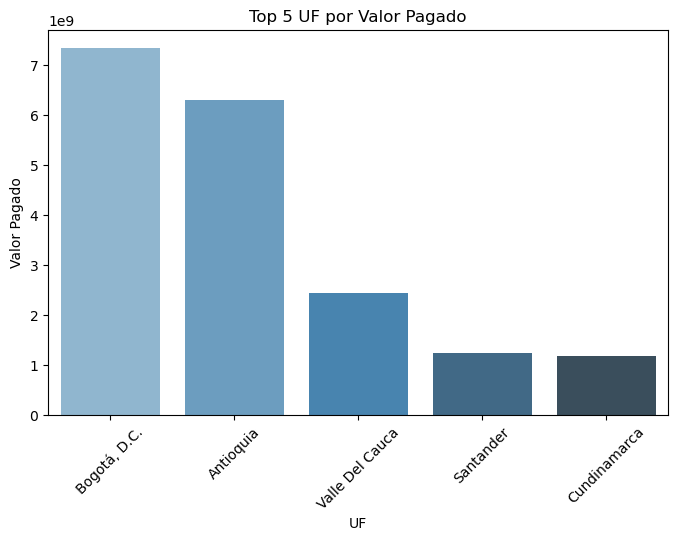

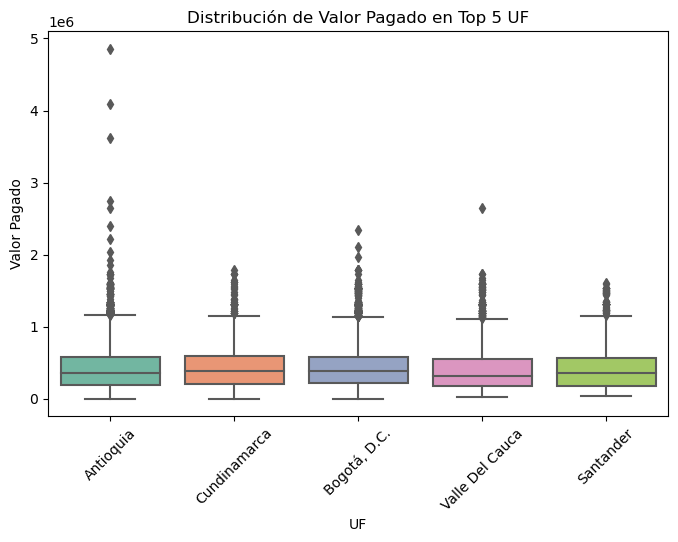

In [10]:
# Agrupar por UF y sumar el Valor Pagado
top5_uf = (
    df.groupby("UF", as_index=False)["Valor Pagado"]
      .sum()
      .sort_values(by="Valor Pagado", ascending=False)
      .head(5)
)

print(top5_uf)

# --- Gráfico de Barras ---
plt.figure(figsize=(8,5))
sns.barplot(data=top5_uf, x="UF", y="Valor Pagado", palette="Blues_d")
plt.title("Top 5 UF por Valor Pagado")
plt.ylabel("Valor Pagado")
plt.xlabel("UF")
plt.xticks(rotation=45)
plt.show()

# --- Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["UF"].isin(top5_uf["UF"])], x="UF", y="Valor Pagado", palette="Set2")
plt.title("Distribución de Valor Pagado en Top 5 UF")
plt.ylabel("Valor Pagado")
plt.xlabel("UF")
plt.xticks(rotation=45)
plt.show()

### Por valor de venta y ciudad

             City  Valor Pagado
61   Bogotá, D.c.    7339447289
292      Medellín    3267409985
80           Cali    1632222828
173      Envigado     739397531
66    Bucaramanga     587903284


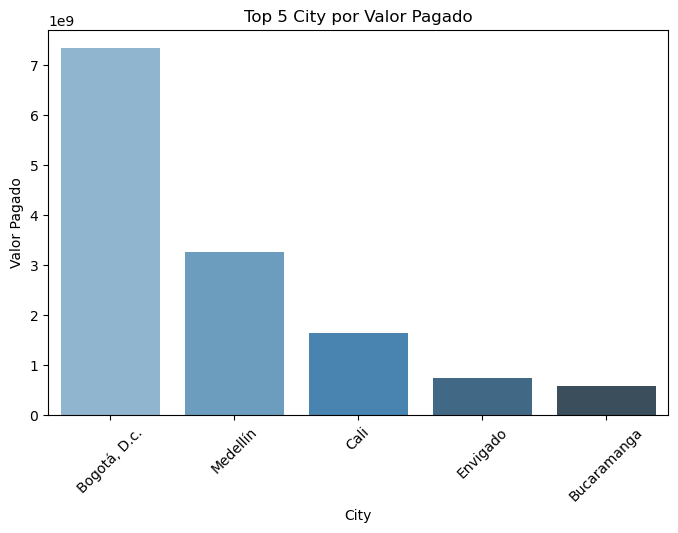

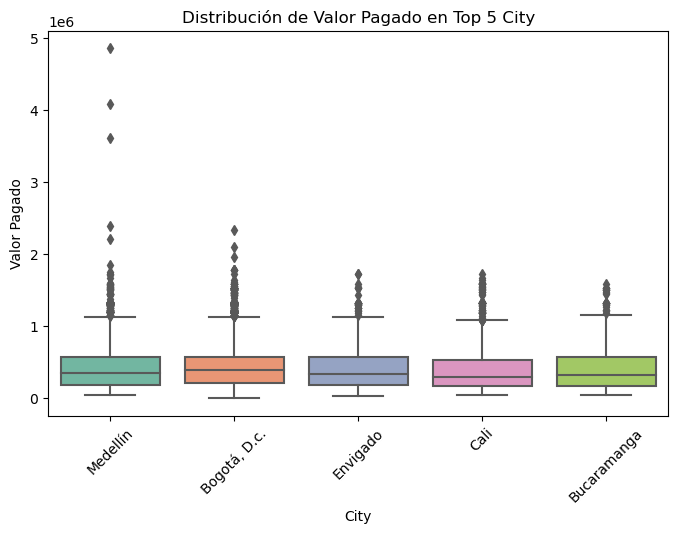

In [11]:
# Agrupar por City y sumar el Valor Pagado
top5_ciudades = (
    df.groupby("City", as_index=False)["Valor Pagado"]
      .sum()
      .sort_values(by="Valor Pagado", ascending=False)
      .head(5)
)

print(top5_ciudades)

# --- Gráfico de Barras ---
plt.figure(figsize=(8,5))
sns.barplot(data=top5_ciudades, x="City", y="Valor Pagado", palette="Blues_d")
plt.title("Top 5 City por Valor Pagado")
plt.ylabel("Valor Pagado")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

# --- Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["City"].isin(top5_ciudades["City"])], x="City", y="Valor Pagado", palette="Set2")
plt.title("Distribución de Valor Pagado en Top 5 City")
plt.ylabel("Valor Pagado")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

Los datos por región revelan la concentración en los datos en regiones muy específicas, pese a que el e-commerce busque abarcar todo el país. Tan solo agrupando Bogotá y Antioquia, estos reúnen el 51% de los ingresos de todo el periodo histórico.

Esta distribución genera preguntas interesantes que pueden conducir la investigación: 

* ¿Existen diferencias relevantes en patrones de compra (frecuencia, ticket promedio, categorías preferidas) entre estas regiones y el resto del país?

* ¿Hay regiones emergentes que, aunque hoy aportan poco, muestran tasas de crecimiento aceleradas?

También, el Boxplot nos muestra que la región de Antioquia presenta una mayor varianza en los datos, por lo que resultará de mayor interés saber identificar a estos usuarios para una segmentación más precisa, y poder identificar cuáles son los patrones de consumo que los diferenia.

Con un panorama general de ingresos por región, ¿existen grandes diferencias también en cuanto al valor promedio de compra y unidades compradas?

In [17]:
# Agrupa por 'UF', calcula el promedio de 'Valor Pagado' y luego ordena de mayor a menor
df_promedio_ordenado = df.groupby('UF')['Valor Pagado'].mean().sort_values(ascending=False)

# Imprime el resultado
print(df_promedio_ordenado)

UF
Arauca                494226.256410
Huila                 468096.548358
Cesar                 441864.775432
Caquetá               436117.243728
Nariño                433742.877404
Quindio               432971.052419
Bolívar               432757.115472
Casanare              432438.184127
Caldas                430503.347623
Córdoba               429775.293478
Tolima                427074.782676
Boyacá                425719.449912
Bogotá, D.C.          425697.308103
Cundinamarca          425418.656635
Meta                  424261.920195
Sucre                 423704.705645
Magdalena             415419.836697
Antioquia             412443.120343
Cauca                 411856.508346
Putumayo              410011.335505
Risaralda             404472.547337
Santander             403320.952918
Atlántico             398762.517702
Norte De Santander    395951.217539
La Guajira            389342.524000
Valle Del Cauca       387420.130566
Chocó                 337634.641189
Name: Valor Pagado, dtype

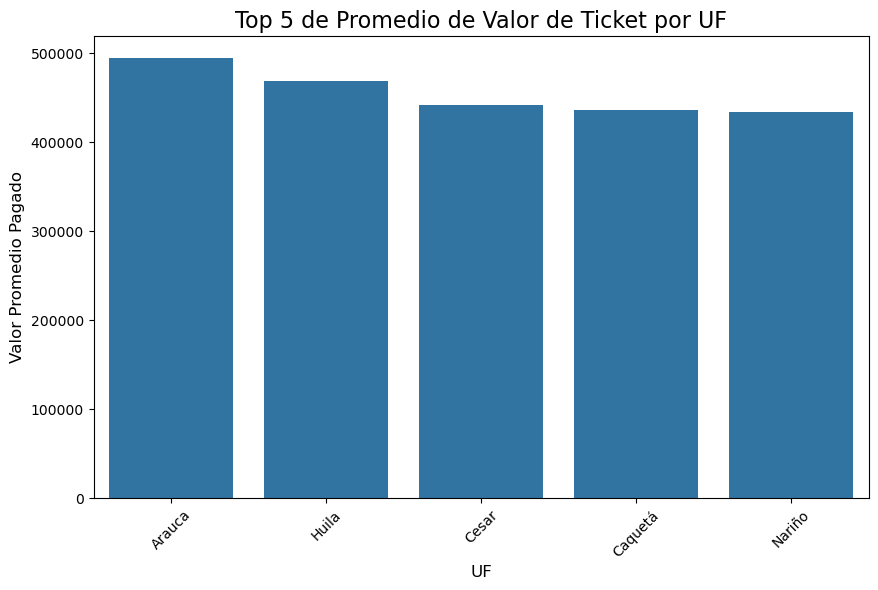

In [20]:
top5_uf_promedio = (
    df.groupby("UF", as_index=False)["Valor Pagado"]
      .mean()  # <-- CAMBIO AQUÍ: de .sum() a .mean()
      .sort_values(by="Valor Pagado", ascending=False)
      .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x='UF', y='Valor Pagado', data=top5_uf_promedio)
plt.title('Top 5 de Promedio de Valor de Ticket por UF', fontsize=16)
plt.xlabel('UF', fontsize=12)
plt.ylabel('Valor Promedio Pagado', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Al promediar las compras por regiones, vemos que las regiones líderes en ingresos no son aquellas que tienen el mayor ticket promedio, lo cual puede indicarnos que los usuarios de mayor categoría podrían estar dispersos a nivel nacional o, bajo otra mirada, que la variable de región no es suficiente para explicar la distribución de clientes en cuanto a su relevancia o patrones de compra.

### Distribución por ingresos

### Por valor de venta y BU

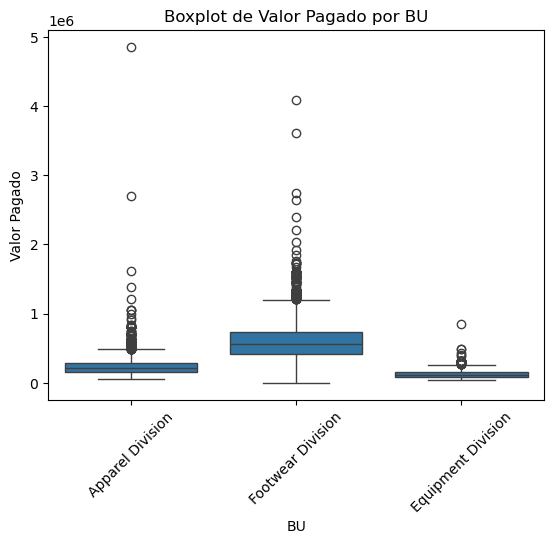

/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/4201121820.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="BU", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")
/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/4201121820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="BU", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")


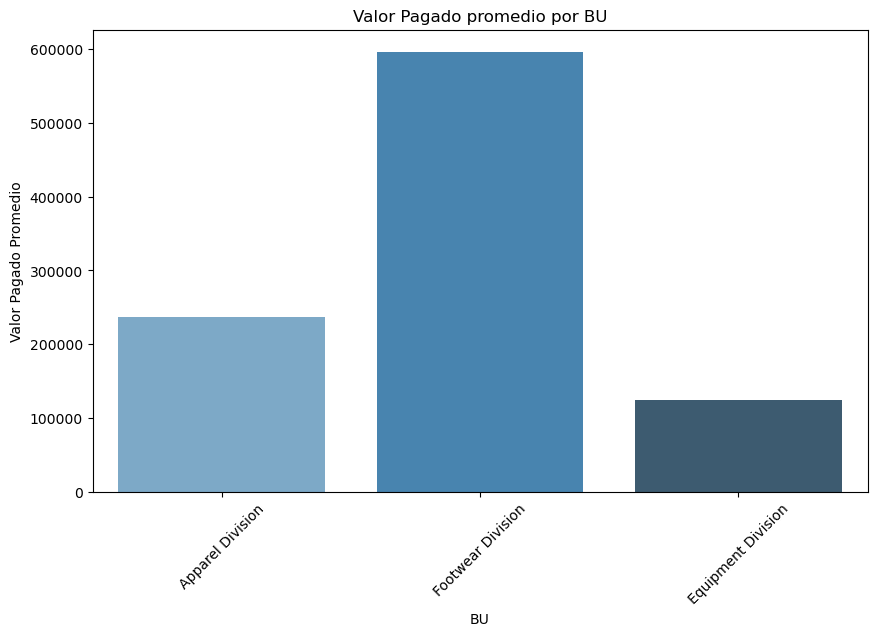

In [ ]:
sns.boxplot(x="BU", y="Valor Pagado", data=df)

plt.xticks(rotation=45)  # Rota las etiquetas del eje X si son largas
plt.title("Boxplot de Valor Pagado por BU")
plt.show()

# Gráfico de barras 
plt.figure(figsize=(10,6))
sns.barplot(x="BU", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")

plt.xticks(rotation=45)  # Rota las etiquetas del eje X
plt.title("Valor Pagado promedio por BU")
plt.ylabel("Valor Pagado Promedio")
plt.xlabel("BU")
plt.show()

### Por valor de venta y género


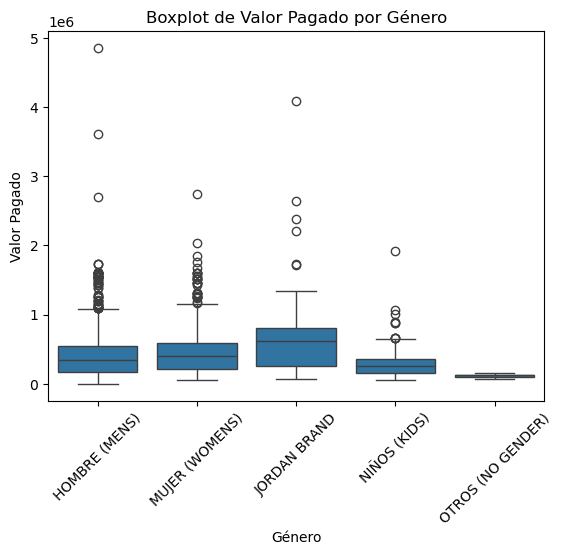

/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/3520310854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Género", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")
/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/3520310854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Género", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")


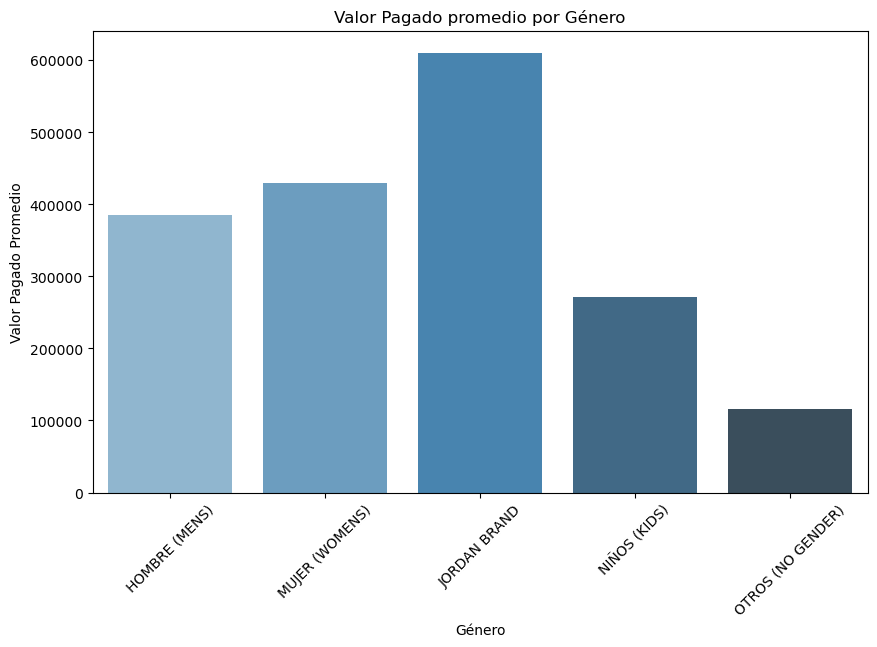

In [ ]:
sns.boxplot(x="Género", y="Valor Pagado", data=df)

plt.xticks(rotation=45)  # Rota las etiquetas del eje X si son largas
plt.title("Boxplot de Valor Pagado por Género")
plt.show()

# Gráfico de barras 
plt.figure(figsize=(10,6))
sns.barplot(x="Género", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")

plt.xticks(rotation=45)  # Rota las etiquetas del eje X
plt.title("Valor Pagado promedio por Género")
plt.ylabel("Valor Pagado Promedio")
plt.xlabel("Género")
plt.show()

### Por valor de venta y categoría

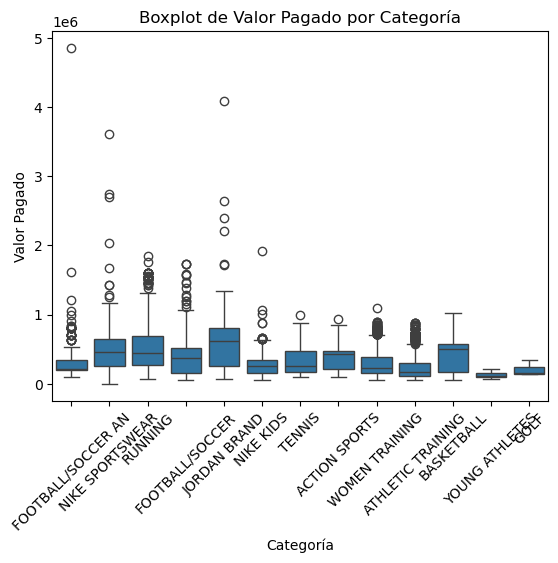

/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/4100944576.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Categoría", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")
/var/folders/4d/rvjbg77s1wd5j0bgcq0kbsqw0000gn/T/ipykernel_85644/4100944576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Categoría", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")


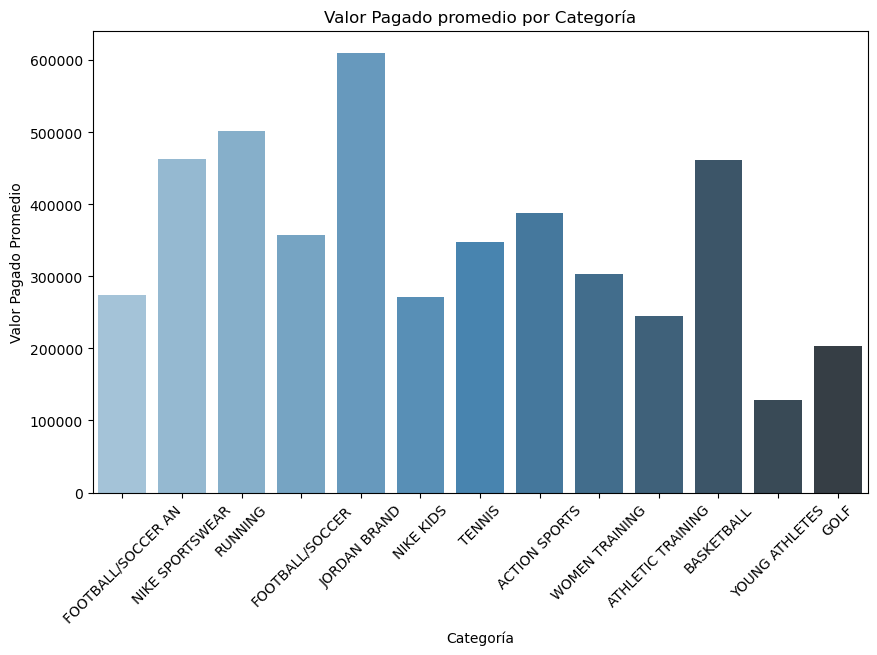

In [ ]:
sns.boxplot(x="Categoría", y="Valor Pagado", data=df)

plt.xticks(rotation=45)  # Rota las etiquetas del eje X si son largas
plt.title("Boxplot de Valor Pagado por Categoría")
plt.show()

# Gráfico de barras 
plt.figure(figsize=(10,6))
sns.barplot(x="Categoría", y="Valor Pagado", data=df, estimator="mean", ci=None, palette="Blues_d")

plt.xticks(rotation=45)  # Rota las etiquetas del eje X
plt.title("Valor Pagado promedio por Categoría")
plt.ylabel("Valor Pagado Promedio")
plt.xlabel("Categoría")
plt.show()

In [12]:
# ============================
# 1. Preparar datos
# ============================
df["FechaSinHora"] = pd.to_datetime(df["FechaSinHora"])
fecha_ref = df["FechaSinHora"].max()

In [13]:
# ============================
# 2. Construir variables por cliente
# ============================
clientes = df.groupby("Client Document").agg({
    "FechaSinHora": [lambda x: (fecha_ref - x.max()).days, "count"], # Recencia y frecuencia
    "Valor Pagado": ["sum", "mean"],                                # Monetario y ticket promedio
    "BU": "nunique",                                                # Diversidad BU
    "RealDiscount": "mean"                                          # % compras con descuento
}).reset_index()

# Renombrar columnas
clientes.columns = ["ClienteID", "Recencia", "Frecuencia", "MontoTotal", 
                    "TicketProm", "DiversidadBU", "PropDescuento"]

TypeError: Could not convert Base inline to numeric

In [7]:
import pandas as pd
import numpy as np

# === CONFIG ===
DATE_COL = "FechaSinHora"
CLIENT_ID = "Client Document"
PAID_COL = "Valor Pagado"
UNITS_COL = "Unidades"
DISCOUNT_FLAG = "RealDiscount"        # binario 0/1
SHIPPING_STATUS = "Shipping Status"   # binario 0/1 si hubo cargo
BU_COL = "BU"                         # Footwear/Apparel/Equipment
GEN_COL = "Género"                    # MENS/WOMENS/JORDAN/KIDS
CAT_COL = "Categoría"
UF_COL = "UF"
CITY_COL = "City"
MODEL_COL = "Model"

# Si ya tienes el DataFrame como df, omite esta línea y deja df como está:
# df = pd.read_csv("TU_ARCHIVO.csv", encoding="utf-8")

# --- Saneo básico ---
df = df.copy()

# 1) Tipos
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")
df[CLIENT_ID] = df[CLIENT_ID].astype(str).str.strip()

for c in [UF_COL, CITY_COL, BU_COL, GEN_COL, CAT_COL, MODEL_COL]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# 2) Normaliza banderas a 0/1
def to_binary(x):
    # Acepta 1/0, True/False, "SI/NO", "Y/N", etc.
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    return int(s in {"1","true","sí","si","y","yes","t","s"})

if DISCOUNT_FLAG in df.columns:
    df[DISCOUNT_FLAG] = df[DISCOUNT_FLAG].apply(to_binary).fillna(0).astype(int)

if SHIPPING_STATUS in df.columns:
    df[SHIPPING_STATUS] = df[SHIPPING_STATUS].apply(to_binary).fillna(0).astype(int)

# 3) Asegura numéricos
for c in [PAID_COL, UNITS_COL]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 4) Deriva un id de orden si no existe. Asumimos (cliente, fecha) ~ 1 orden.
#    Si tienes OrderID real, reemplaza ORDER_ID_COL por el nombre correcto.
ORDER_ID_COL = "_OrderIdTmp"
df[ORDER_ID_COL] = df[CLIENT_ID].astype(str) + "||" + df[DATE_COL].dt.strftime("%Y-%m-%d")

# 5) Nivel orden: suma valores y unidades por orden
order_cols_keep = [ORDER_ID_COL, CLIENT_ID, DATE_COL, PAID_COL, UNITS_COL,
                   DISCOUNT_FLAG, SHIPPING_STATUS, BU_COL, GEN_COL, CAT_COL, UF_COL, CITY_COL]

order_cols_keep = [c for c in order_cols_keep if c in df.columns]
orders = (
    df[order_cols_keep]
    .groupby([ORDER_ID_COL, CLIENT_ID, DATE_COL], as_index=False)
    .agg({PAID_COL:"sum", UNITS_COL:"sum",
          DISCOUNT_FLAG:"max", SHIPPING_STATUS:"max",
          BU_COL:"first", GEN_COL:"first", CAT_COL:"first",
          UF_COL:"first", CITY_COL:"first"})
)

# Info rápida
n_clients = orders[CLIENT_ID].nunique()
n_orders  = orders[ORDER_ID_COL].nunique()
date_min, date_max = orders[DATE_COL].min(), orders[DATE_COL].max()

print(f"Clientes únicos: {n_clients:,}")
print(f"Órdenes únicas : {n_orders:,}")
print(f"Ventana datos  : {date_min.date()} → {date_max.date()}  (≈ {(date_max-date_min).days} días)")


Clientes únicos: 37,123
Órdenes únicas : 48,085
Ventana datos  : 2024-02-06 → 2025-07-31  (≈ 541 días)


In [8]:
# Órdenes por cliente
by_client = (
    orders.groupby(CLIENT_ID)
    .agg(
        n_orders=(ORDER_ID_COL, "nunique"),
        first_dt=(DATE_COL, "min"),
        last_dt=(DATE_COL, "max"),
        revenue=(PAID_COL, "sum"),
        aov=(PAID_COL, "mean")
    )
    .assign(days_active=lambda x: (x["last_dt"] - x["first_dt"]).dt.days.clip(lower=0))
    .reset_index()
)

one_timers = (by_client["n_orders"] == 1).sum()
repeaters  = (by_client["n_orders"] >= 2).sum()

pct_repeaters = 100 * repeaters / len(by_client)
pct_one_timers = 100 * one_timers / len(by_client)

print(f"Clientes con 1 compra : {one_timers:,} ({pct_one_timers:.1f}%)")
print(f"Clientes con 2+ compras: {repeaters:,} ({pct_repeaters:.1f}%)")


Clientes con 1 compra : 30,381 (81.8%)
Clientes con 2+ compras: 6,742 (18.2%)


In [9]:
# Construimos diferencias de tiempo entre compras por cliente (solo recompradores)
def interpurchase_days(g):
    g = g.sort_values(DATE_COL)
    diffs = g[DATE_COL].diff().dt.days.dropna()
    return pd.Series({
        "n_gaps": len(diffs),
        "mean_days": diffs.mean() if len(diffs) else np.nan,
        "median_days": diffs.median() if len(diffs) else np.nan
    })

rebuyers = orders.groupby(CLIENT_ID).filter(lambda x: x[ORDER_ID_COL].nunique() >= 2)
ip_stats_by_client = rebuyers.groupby(CLIENT_ID).apply(interpurchase_days).reset_index()

overall_mean   = ip_stats_by_client["mean_days"].mean()
overall_median = ip_stats_by_client["median_days"].median()

print(f"Interpurchase - promedio (entre clientes): {overall_mean:.1f} días")
print(f"Interpurchase - mediana (entre clientes):  {overall_median:.1f} días")

# Útil: percentiles para ver “curva de paciencia”
percentiles = ip_stats_by_client["median_days"].quantile([0.1,0.25,0.5,0.75,0.9]).round(1)
print("\nPercentiles de la MEDIANA por cliente:\n", percentiles)

Interpurchase - promedio (entre clientes): 94.8 días
Interpurchase - mediana (entre clientes):  58.0 días

Percentiles de la MEDIANA por cliente:
 0.10      5.0
0.25     17.0
0.50     58.0
0.75    140.0
0.90    232.0
Name: median_days, dtype: float64


In [10]:
heavy_users = (by_client["n_orders"] >= 3).sum()
pct_heavy = 100 * heavy_users / len(by_client)

print(f"Heavy users (3+ órdenes): {heavy_users:,} ({pct_heavy:.1f}%)")

# (Opcional) ¿qué % del revenue traen?
revenue_share_heavy = 100 * by_client.loc[by_client["n_orders"]>=3, "revenue"].sum() / by_client["revenue"].sum()
print(f"Participación de revenue de heavy users: {revenue_share_heavy:.1f}%")


Heavy users (3+ órdenes): 2,040 (5.5%)
Participación de revenue de heavy users: 20.4%


In [12]:
# === A) Proporción de recompradores por BU (corregido) ===
by_client_with_bu = (
    orders.groupby([CLIENT_ID, BU_COL], dropna=False)
    .agg(
        n_orders=(ORDER_ID_COL, "nunique"),
        revenue=(PAID_COL, "sum")
    )
    .reset_index()
)
by_client_with_bu["is_repeater"] = by_client_with_bu["n_orders"] >= 2

bu_stats = (
    by_client_with_bu.groupby(BU_COL, dropna=False)
    .agg(
        n_clients=(CLIENT_ID, "nunique"),
        n_repeaters=("is_repeater", "sum"),
        sum_revenue=("revenue", "sum")
    )
    .assign(pct_repeaters=lambda d: 100*d["n_repeaters"]/d["n_clients"])
    .reset_index()
)

print("Recompra por BU:")
print(bu_stats.sort_values("pct_repeaters", ascending=False))


# === B) Proporción de recompradores por Categoría (corregido) ===
by_client_cat = (
    orders.groupby([CLIENT_ID, CAT_COL], dropna=False)
    .agg(
        n_orders=(ORDER_ID_COL, "nunique"),
        revenue=(PAID_COL, "sum")
    )
    .reset_index()
)
by_client_cat["is_repeater"] = by_client_cat["n_orders"] >= 2

cat_stats = (
    by_client_cat.groupby(CAT_COL, dropna=False)
    .agg(
        n_clients=(CLIENT_ID, "nunique"),
        n_repeaters=("is_repeater", "sum"),
        sum_revenue=("revenue", "sum")
    )
    .assign(pct_repeaters=lambda d: 100*d["n_repeaters"]/d["n_clients"])
    .reset_index()
)

print("\nTop categorías por % de recompradores (min 200 clientes para evitar ruido):")
cat_stats_filt = cat_stats[cat_stats["n_clients"]>=200]
print(cat_stats_filt.sort_values("pct_repeaters", ascending=False).head(10))


# === C) Mediana de inter-purchase por BU / Categoría (solo clientes con 2+ órdenes en esa BU/Cat) ===
def interpurchase_median_per_client(sub):
    # mediana por cliente dentro del subgrupo
    return (
        sub.sort_values(DATE_COL)
           .groupby(CLIENT_ID)[DATE_COL]
           .apply(lambda s: s.diff().dt.days.dropna().median())
           .dropna()
    )

# Por BU
print("\nMediana inter-purchase por BU (días):")
ip_bu = []
for bu, sub in orders.groupby(BU_COL, dropna=False):
    # solo clientes con 2+ órdenes en esa BU
    clients_2plus = sub.groupby(CLIENT_ID)[ORDER_ID_COL].nunique()
    keep = clients_2plus[clients_2plus>=2].index
    medians = interpurchase_median_per_client(sub[sub[CLIENT_ID].isin(keep)])
    if len(medians):
        ip_bu.append((bu, medians.median(), len(medians)))
for bu, ip_med, ncli in sorted(ip_bu, key=lambda x: x[1]):
    print(f"  {bu}: {ip_med:.1f} días (n clientes={ncli})")

# Por Categoría (en top categorías por tamaño)
top_cats = cat_stats.sort_values("n_clients", ascending=False).head(8)[CAT_COL].tolist()
print("\nMediana inter-purchase por Categoría (días):")
ip_cat = []
for cat in top_cats:
    sub = orders[orders[CAT_COL]==cat]
    clients_2plus = sub.groupby(CLIENT_ID)[ORDER_ID_COL].nunique()
    keep = clients_2plus[clients_2plus>=2].index
    medians = interpurchase_median_per_client(sub[sub[CLIENT_ID].isin(keep)])
    if len(medians):
        ip_cat.append((cat, medians.median(), len(medians)))
for cat, ip_med, ncli in sorted(ip_cat, key=lambda x: x[1]):
    print(f"  {cat}: {ip_med:.1f} días (n clientes={ncli})")


# === D) Perfil de heavy users (3+ órdenes en TOTAL) ===
heavy_ids = by_client.loc[by_client["n_orders"]>=3, CLIENT_ID]
heavy_orders = orders[orders[CLIENT_ID].isin(heavy_ids)]

# Mix por BU / Categoría / Género dentro de heavy users
hu_bu = heavy_orders[BU_COL].value_counts(normalize=True).mul(100).round(1)
hu_cat = heavy_orders[CAT_COL].value_counts(normalize=True).mul(100).round(1).head(10)
hu_gen = heavy_orders[GEN_COL].value_counts(normalize=True).mul(100).round(1)

# AOV y % con descuento en heavy vs. no-heavy
heavy_flag = orders[CLIENT_ID].isin(heavy_ids)
cmp = (
    orders.assign(_heavy=heavy_flag)
    .groupby("_heavy")
    .agg(
        orders_count=(ORDER_ID_COL, "nunique"),
        clients=(CLIENT_ID, "nunique"),
        revenue=(PAID_COL, "sum"),
        AOV=(PAID_COL, "mean"),
        pct_orders_discount=(DISCOUNT_FLAG, "mean")
    )
)
cmp["pct_orders_discount"] = (cmp["pct_orders_discount"]*100).round(1)

print("\nHeavy users — mix y sensibilidad a descuento:")
print("Mix BU (%):\n", hu_bu.to_string())
print("\nTop 10 Categorías (%):\n", hu_cat.to_string())
print("\nMix Género (%):\n", hu_gen.to_string())
print("\nComparativo heavy vs no heavy:\n", cmp)


Recompra por BU:
                   BU  n_clients  n_repeaters  sum_revenue  pct_repeaters
2   Footwear Division      25129         4125  21152685882      16.415297
0    Apparel Division      11335         1522   4863714368      13.427437
1  Equipment Division       3038          153    550513557       5.036208

Top categorías por % de recompradores (min 200 clientes para evitar ruido):
             Categoría  n_clients  n_repeaters  sum_revenue  pct_repeaters
8      NIKE SPORTSWEAR      13720         1837   9573594361      13.389213
9              RUNNING       5892          742   4814333308      12.593347
11      WOMEN TRAINING       2758          346   1641539649      12.545323
6         JORDAN BRAND       4885          537   4260439523      10.992835
7            NIKE KIDS       2848          296   1108303886      10.393258
3      FOOTBALL/SOCCER       3337          335   1759756977      10.038957
10              TENNIS        668           56    361523675       8.383234
1    ATHLE

# Análisis de Recompra y Heavy Users

## Hallazgos Principales

- **Divisiones:**
  - *Footwear Division:* todo el calzado (tenis de lifestyle, running, fútbol, Jordan, etc.).
  - *Apparel Division:* ropa (camisetas, pantalones, leggings, hoodies).
  - *Equipment Division:* accesorios (maletas, balones, gorras, termos, medias).

## Tasas de Recompra por División
- Footwear: **16.4%** de recompradores.
- Apparel: **13.4%**.
- Equipment: **5%**.

La **mediana de inter-purchase** (tiempo entre compras) es:
- Equipment: **42 días**.
- Apparel: **47 días**.
- Footwear: **57 días**.

👉 Esto sugiere que el calzado, aunque es un producto de ciclo largo, sí tiene subsegmentos de clientes que lo rotan con frecuencia.

## Categorías con Mayor Recompra
- NIKE SPORTSWEAR: 13.4%
- RUNNING: 12.6%
- WOMEN TRAINING: 12.5%
- JORDAN BRAND: 11.0%
- NIKE KIDS: 10.4%

👉 Las categorías de **fútbol** tienen ciclos de recompra particularmente cortos (mediana de 26–28 días).

## Heavy Users
- Representan el **5.5% de clientes** pero aportan el **20% de ingresos**.
- Su **AOV es mayor**: 653k vs. 531k en los demás.
- Mix de categorías:
  - NIKE SPORTSWEAR (34%)
  - RUNNING (17.5%)
  - JORDAN BRAND (13%)
  - WOMEN TRAINING (9%)
  - ATHLETIC TRAINING (8%)
  - Fútbol (≈9%)

## Segmentos Naturales de Heavy Users
1. **Fitness/Gimnasio** → Sportswear, Women Training, Athletic Training.  
2. **Corredores** → Running.  
3. **Fútbol** → Football/Soccer.  
4. **Moda** → Jordan Brand y Sportswear.

👉 Diferenciar campañas:  
- Fitness/Running/Fútbol → mensajes de performance y lanzamientos técnicos.  
- Moda/Jordan → comunicación aspiracional y lifestyle.


Resumen gasto por tipo de cliente:
         is_rebuyer  clientes   gasto_total            AOV  n_orders
0     One-timer (1)     30381  5.157560e+05  515755.962180  1.000000
1  Recomprador (2+)      6742  1.616395e+06  601179.022974  2.625927


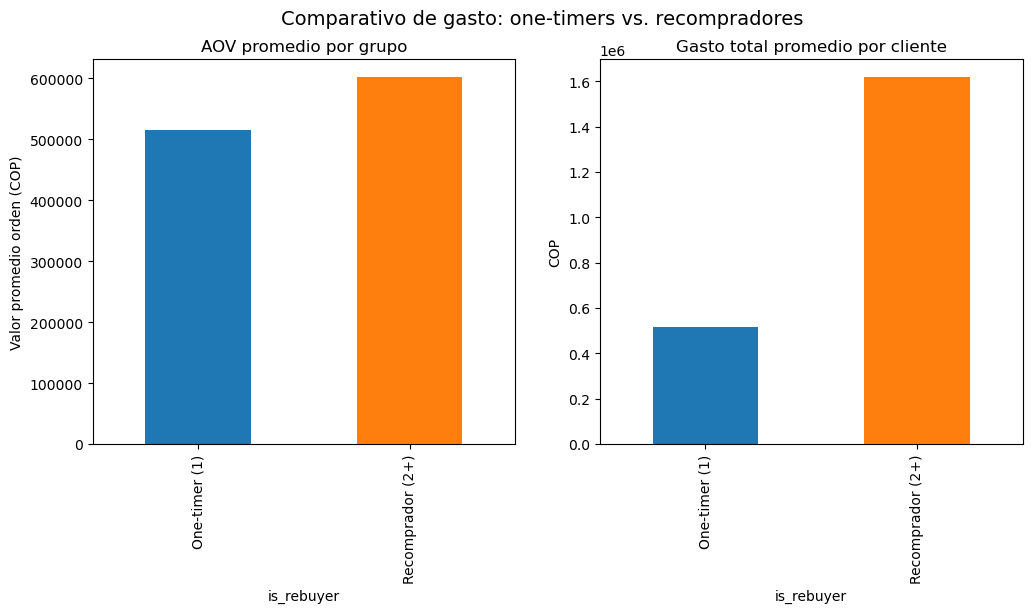

In [13]:
import matplotlib.pyplot as plt

# Agrupamos clientes en grupos: one-timers vs. recompradores
by_client["is_rebuyer"] = np.where(by_client["n_orders"]>=2, "Recomprador (2+)", "One-timer (1)")

# Resumen por grupo
rebuy_summary = (
    by_client.groupby("is_rebuyer")
    .agg(
        clientes=(CLIENT_ID, "count"),
        gasto_total=("revenue", "mean"),
        AOV=("aov", "mean"),
        n_orders=("n_orders", "mean")
    )
    .reset_index()
)

print("Resumen gasto por tipo de cliente:")
print(rebuy_summary)

# --- Gráfica comparativa ---
fig, ax = plt.subplots(1,2, figsize=(12,5))

# AOV
by_client.groupby("is_rebuyer")["aov"].mean().plot(kind="bar", ax=ax[0], color=["#1f77b4","#ff7f0e"])
ax[0].set_title("AOV promedio por grupo")
ax[0].set_ylabel("Valor promedio orden (COP)")

# Gasto total por cliente
by_client.groupby("is_rebuyer")["revenue"].mean().plot(kind="bar", ax=ax[1], color=["#1f77b4","#ff7f0e"])
ax[1].set_title("Gasto total promedio por cliente")
ax[1].set_ylabel("COP")

plt.suptitle("Comparativo de gasto: one-timers vs. recompradores", fontsize=14)
plt.show()


### One-timers vs. Recompradores

- **One-timer (1):** cliente con solo **1 orden registrada** en el periodo analizado (feb 2024 – jul 2025).
- **Recomprador (2+):** cliente con **2 o más órdenes** en ese mismo periodo.

⚠️ Importante:  
La definición de *one-timer* puede **sobreestimar clientes "infieles"** porque incluye a quienes compraron recientemente y **no han tenido suficiente tiempo** para volver a comprar.  
Ejemplo: alguien que compró por primera vez en **julio 2025** aún no tuvo chance de demostrar recompra.

Por eso, es recomendable:
- Condicionar el análisis a clientes con ≥180 días de antigüedad desde su primera compra.
- Usar **cohortes de primera compra** para ver la recompra a 30, 60, 90, 180 días.


In [14]:
# Fecha de corte = última fecha en la data
cutoff_date = orders[DATE_COL].max()

# Definimos antigüedad desde la primera compra
by_client["days_since_first"] = (cutoff_date - by_client["first_dt"]).dt.days

# Filtramos clientes con al menos 180 días de "exposición"
eligible = by_client[by_client["days_since_first"] >= 180]

# Calculamos tasa de recompra en ese subconjunto
total_eligible = len(eligible)
rebuyers_eligible = (eligible["n_orders"] >= 2).sum()
pct_rebuyers_eligible = 100 * rebuyers_eligible / total_eligible

print(f"Clientes con ≥180 días desde primera compra: {total_eligible:,}")
print(f"Recompradores en ese grupo: {rebuyers_eligible:,} ({pct_rebuyers_eligible:.1f}%)")


Clientes con ≥180 días desde primera compra: 25,853
Recompradores en ese grupo: 5,533 (21.4%)


### Recompra ajustada por tiempo de exposición

- **Recompra cruda (todos los clientes):** 18.2%  
- **Recompra ajustada (solo clientes con ≥180 días desde la primera compra):** 21.4%

#### Conclusiones:
1. La tasa cruda subestima la realidad porque incluye a clientes muy recientes (ej. julio 2025) que aún no han tenido tiempo de recomprar.  
2. Al condicionar por antigüedad (≥180 días), la tasa de recompra sube a **21.4%**, lo que ubica a Nike Colombia en el rango bajo-medio de benchmarks internacionales (20–25% en retail moda/deporte).  
3. Esto confirma que el canal está alineado con estándares de la industria y que los clientes que tienen suficiente exposición sí muestran recompra significativa.  
4. Para modelos de segmentación (ej. RFM), es clave considerar la **antigüedad del cliente** para no penalizar a los recién adquiridos como “infieles”.


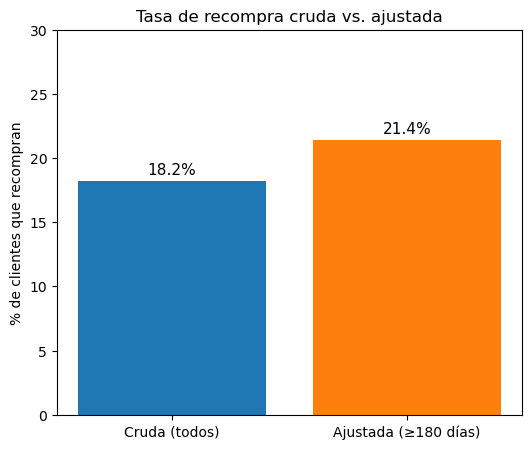

In [15]:
import matplotlib.pyplot as plt

rates = {
    "Cruda (todos)": 18.2,
    "Ajustada (≥180 días)": 21.4
}

fig, ax = plt.subplots(figsize=(6,5))
ax.bar(rates.keys(), rates.values(), color=["#1f77b4","#ff7f0e"])
ax.set_ylim(0,30)
ax.set_ylabel("% de clientes que recompran")
ax.set_title("Tasa de recompra cruda vs. ajustada")
for i, v in enumerate(rates.values()):
    ax.text(i, v+0.5, f"{v:.1f}%", ha="center", fontsize=11)

plt.show()


## Conclusiones Parciales (Preguntas 1–4)

**1. ¿Qué porcentaje de clientes ha comprado más de una vez en el periodo (1 año)?**  
- Crudo: **18.2%** de los clientes.  
- Ajustado (≥180 días de exposición): **21.4%**.  
- 👉 En línea con benchmarks de retail moda (20–25%).

**2. Entre los que recompran, ¿cuál es el tiempo promedio y mediano entre compras?**  
- Mediana global: **58 días** (promedio 95 días).  
- Por división/categoría:  
  - Footwear ~57 días  
  - Apparel ~47 días  
  - Football/Soccer ~26 días  
- 👉 Las recompras rápidas vienen de categorías como fútbol y training; calzado premium rota más lento.

**3. ¿Existen “heavy users” (3+ órdenes)? ¿Qué % representan?**  
- Sí: **5.5% de clientes**, generan **20% del revenue**.  
- Segmentos naturales:  
  - Fitness/Gimnasio (Sportswear, Training)  
  - Running  
  - Fútbol  
  - Moda/Jordan

**4. ¿Los recompradores gastan más o menos que los de compra única?**  
- One-timers: gasto total medio **0.52M COP**, AOV **516k COP**.  
- Recompradores: gasto total medio **1.62M COP**, AOV **601k COP**.  
- 👉 Recompradores no solo vuelven, sino que gastan más y tienen mayor valor para la marca.

---

### Síntesis
- La recompra es baja pero esperada en la categoría; clientes con tiempo suficiente muestran niveles acordes a benchmarks.  
- Existen ciclos de recompra muy distintos por división/categoría: **fútbol y training** con rotación corta, **calzado premium** con rotación más larga.  
- Los **heavy users** son pocos pero muy valiosos, con clústeres de interés definidos.  
- Retener clientes paga: los recompradores generan más valor y justifican estrategias de fidelización focalizada.


Distribución de órdenes con/sin descuento:
   RealDiscount  n_orders    pct
0             0     48085  100.0


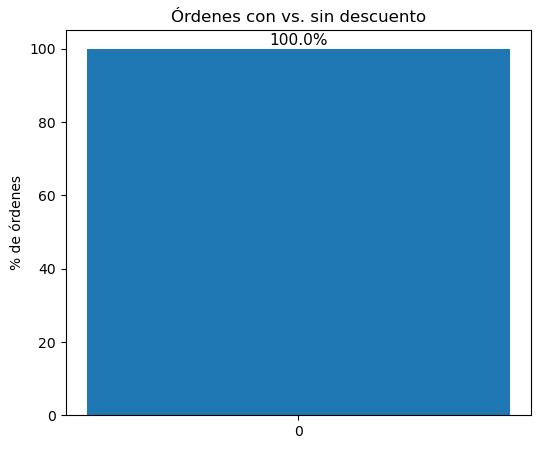

In [16]:
import matplotlib.pyplot as plt

# Proporción de órdenes con descuento (flag que ya habíamos creado)
discount_stats = (
    orders.groupby(DISCOUNT_FLAG)[ORDER_ID_COL].nunique()
    .reset_index()
    .rename(columns={ORDER_ID_COL: "n_orders"})
)

total_orders = discount_stats["n_orders"].sum()
discount_stats["pct"] = 100 * discount_stats["n_orders"] / total_orders

print("Distribución de órdenes con/sin descuento:")
print(discount_stats)

# --- Gráfica ---
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(discount_stats[DISCOUNT_FLAG].astype(str), discount_stats["pct"], color=["#1f77b4","#ff7f0e"])
ax.set_ylabel("% de órdenes")
ax.set_title("Órdenes con vs. sin descuento")
for i, v in enumerate(discount_stats["pct"]):
    ax.text(i, v+1, f"{v:.1f}%", ha="center", fontsize=11)

plt.show()


Columnas que contienen 'discount' en df: ['RealDiscount', 'Discounts Names']
Usaremos como 'nombre de descuento': Discounts Names

Distribución (proxy) de órdenes con/sin descuento a partir del nombre de descuento:
   has_discount_name  n_orders        pct
0                  0      5799  12.059894
1                  1     42286  87.940106


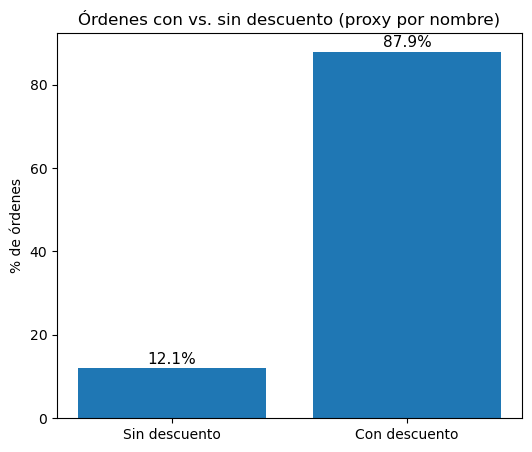

In [18]:
# 1) Inspeccionar columnas relacionadas con "discount"
discount_like_cols = [c for c in df.columns if "discount" in c.lower()]
print("Columnas que contienen 'discount' en df:", discount_like_cols)

# 2) Elegir una columna candidata de NOMBRE de descuento distinta del flag binario
#    (usamos la primera que NO sea RealDiscount)
cand_text_cols = [c for c in discount_like_cols if c != DISCOUNT_FLAG]
if len(cand_text_cols) == 0:
    print("No se encontró columna de texto con nombre de descuento. Probablemente la extracción no la incluyó.")
    # En este caso no podemos responder Q5 con precisión. Salimos temprano.
else:
    DISCOUNT_NAME_COL = cand_text_cols[0]
    print("Usaremos como 'nombre de descuento':", DISCOUNT_NAME_COL)

    # 3) Crear flag de "hay descuento" a partir de esa columna de texto en el NIVEL ORDEN
    #    (cualquier valor no vacío o no nulo -> 1)
    tmp = (
        df
        .assign(_has_disc=lambda d: d[DISCOUNT_NAME_COL].astype(str).str.strip().ne("") & d[DISCOUNT_NAME_COL].notna())
        .groupby(ORDER_ID_COL, as_index=False)["_has_disc"].max()
        .rename(columns={"_has_disc":"has_discount_name"})
    )
    tmp["has_discount_name"] = tmp["has_discount_name"].astype(int)

    # 4) Unimos ese flag a la tabla de órdenes
    if "has_discount_name" in orders.columns:
        orders = orders.drop(columns=["has_discount_name"])
    orders = orders.merge(tmp, on=ORDER_ID_COL, how="left")
    orders["has_discount_name"] = orders["has_discount_name"].fillna(0).astype(int)

    # 5) Recalcular distribución de órdenes con/sin descuento usando el NUEVO flag
    discount_stats2 = (
        orders.groupby("has_discount_name")[ORDER_ID_COL].nunique()
        .reset_index()
        .rename(columns={ORDER_ID_COL: "n_orders"})
    )
    total_orders2 = discount_stats2["n_orders"].sum()
    discount_stats2["pct"] = 100 * discount_stats2["n_orders"] / total_orders2

    print("\nDistribución (proxy) de órdenes con/sin descuento a partir del nombre de descuento:")
    print(discount_stats2)

    # 6) Gráfica
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6,5))
    labels = discount_stats2["has_discount_name"].map({0:"Sin descuento", 1:"Con descuento"})
    ax.bar(labels, discount_stats2["pct"])
    ax.set_ylabel("% de órdenes")
    ax.set_title("Órdenes con vs. sin descuento (proxy por nombre)")
    for i, v in enumerate(discount_stats2["pct"]):
        ax.text(i, v+1, f"{v:.1f}%", ha="center", fontsize=11)
    plt.show()


In [20]:
df["Discounts Names"].nunique(), df["Discounts Names"].notna().mean()


(624, 0.9027912659377839)

In [26]:
df["Discounts Names"].value_counts().head(50)


Discounts Names
Flete Gratis                                                                                     29054
30% de descuento, Flete Gratis                                                                    3169
20% de descuento, Flete Gratis                                                                    3016
40% de descuento, Flete Gratis                                                                    2335
40% de descuento                                                                                  2032
25% de descuento, Flete Gratis                                                                    1090
Flete Gratis, 20% de descuento                                                                    1049
30% de descuento                                                                                   940
20% de descuento                                                                                   817
Flete Gratis, 30% de descuento                           

A) Órdenes con 'cualquier descuento' (incluyendo flete gratis):
  has_discount_name  n_orders        pct
0               Sin      5799  12.059894
1               Con     42286  87.940106

B) Órdenes con DESCUENTO REAL de precio:
  has_price_discount  n_orders        pct
0                Sin     28991  60.291151
1                Con     19094  39.708849

C) Órdenes con SOLO flete gratis (sin rebaja de precio):
  has_only_free_shipping  n_orders        pct
0          No sólo flete     24960  51.908079
1             Sólo flete     23125  48.091921

Top 15 ciudades con mayor % de órdenes con 'Sólo flete gratis':
City
Gamarra                  100.0
Guachucal                100.0
Sotaquirá                100.0
Soracá                   100.0
El Copey                 100.0
El Zulia                 100.0
Falan                    100.0
Galán                    100.0
Santiago De Tolú         100.0
Gualmatán                100.0
Tununguá                 100.0
Santana                  100.0
Santa H

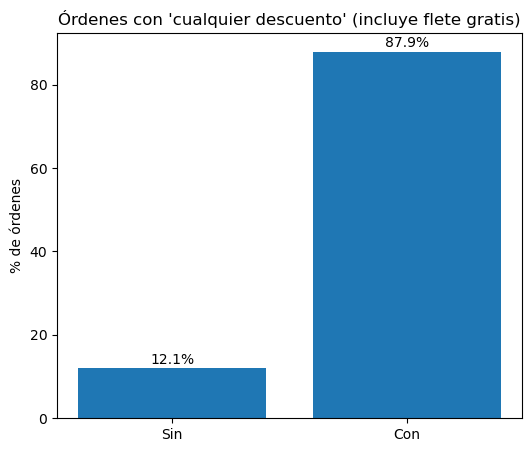

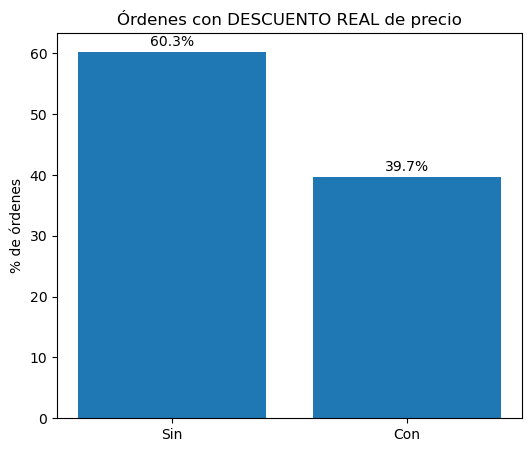

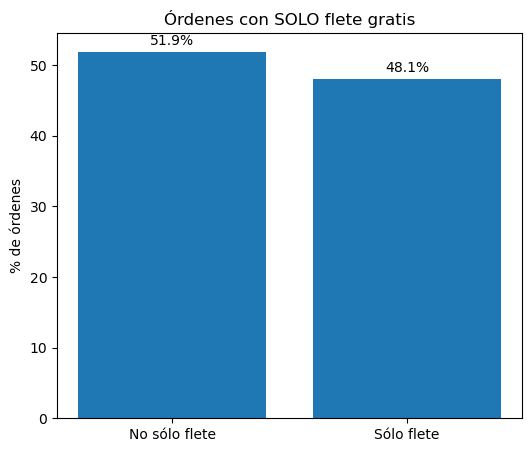

In [25]:
import re

DISCOUNT_NAME_COL = "Discounts Names"  # nombre exacto en df

# --- 1) Agregar nombres de descuento por orden desde df ---
def _normalize_text(s):
    if pd.isna(s): return ""
    return str(s).strip()

def _to_lower(s):
    return _normalize_text(s).lower()

def _has_price_discount(text_lower):
    # Señales de rebaja en precio (no solo flete gratis)
    return bool(re.search(r"\d+\s*%", text_lower)) or ("descuento" in text_lower) or ("dcto" in text_lower)

def _is_free_shipping_only(text_lower):
    # True si SOLO hay "flete gratis" / "free shipping" / "envio gratis" (y nada más)
    # Detectamos si NO hay patrones de precio
    if _has_price_discount(text_lower):
        return False
    # tokens que consideramos como envío gratis
    return ("flete gratis" in text_lower) or ("free shipping" in text_lower) or ("envío gratis" in text_lower) or ("envio gratis" in text_lower)

# Agrupamos por orden, uniendo nombres únicos y creando flags
order_discounts = (
    df[[ORDER_ID_COL, DISCOUNT_NAME_COL]]
      .assign(_disc_original=lambda d: d[DISCOUNT_NAME_COL].apply(_normalize_text),
              _disc_lower=lambda d: d[DISCOUNT_NAME_COL].apply(_to_lower))
      .groupby(ORDER_ID_COL, as_index=False)
      .agg(
          discount_names = ("_disc_original", lambda s: ", ".join(sorted({x for x in s if x}))),
          _all_lower     = ("_disc_lower",   lambda s: ", ".join(sorted({x for x in s if x})))
      )
)

# Flags a nivel orden
order_discounts["has_discount_name"]     = (order_discounts["discount_names"].str.len() > 0).astype(int)
order_discounts["has_price_discount"]    = order_discounts["_all_lower"].apply(_has_price_discount).astype(int)
order_discounts["has_only_free_shipping"]= order_discounts["_all_lower"].apply(_is_free_shipping_only).astype(int)

# Limpieza
order_discounts = order_discounts.drop(columns=["_all_lower"])

# --- 2) Merge a 'orders' ---
for c in ["discount_names","has_discount_name","has_price_discount","has_only_free_shipping"]:
    if c in orders.columns:
        orders.drop(columns=[c], inplace=True)

orders = orders.merge(order_discounts, on=ORDER_ID_COL, how="left")

orders[["has_discount_name","has_price_discount","has_only_free_shipping"]] = (
    orders[["has_discount_name","has_price_discount","has_only_free_shipping"]]
    .fillna(0).astype(int)
)

# --- 3) Pregunta 5 (revisada) ---
# a) "Cualquier descuento" (incluye flete gratis)
any_disc = (
    orders.groupby("has_discount_name")[ORDER_ID_COL].nunique()
          .rename("n_orders").reset_index()
)
any_disc["pct"] = 100 * any_disc["n_orders"] / any_disc["n_orders"].sum()

# b) "Descuento REAL de precio"
real_disc = (
    orders.groupby("has_price_discount")[ORDER_ID_COL].nunique()
          .rename("n_orders").reset_index()
)
real_disc["pct"] = 100 * real_disc["n_orders"] / real_disc["n_orders"].sum()

# c) Solo flete gratis (sin rebaja de precio)
only_ship = (
    orders.groupby("has_only_free_shipping")[ORDER_ID_COL].nunique()
          .rename("n_orders").reset_index()
)
only_ship["pct"] = 100 * only_ship["n_orders"] / only_ship["n_orders"].sum()

print("A) Órdenes con 'cualquier descuento' (incluyendo flete gratis):")
print(any_disc.replace({0:"Sin",1:"Con"}))

print("\nB) Órdenes con DESCUENTO REAL de precio:")
print(real_disc.replace({0:"Sin",1:"Con"}))

print("\nC) Órdenes con SOLO flete gratis (sin rebaja de precio):")
print(only_ship.replace({0:"No sólo flete",1:"Sólo flete"}))

# --- 4) (Opcional) Validación de hipótesis de Bogotá ---
by_city_only_ship = (
    orders.groupby(CITY_COL)["has_only_free_shipping"].mean()
          .sort_values(ascending=False).head(15).mul(100).round(1)
)
print("\nTop 15 ciudades con mayor % de órdenes con 'Sólo flete gratis':")
print(by_city_only_ship)

# --- 5) Gráficas rápidas ---
import matplotlib.pyplot as plt

def _bar_plot(df, flag_col, title, labels_map):
    fig, ax = plt.subplots(figsize=(6,5))
    plot_df = df.copy()
    plot_df[flag_col] = plot_df[flag_col].map(labels_map)
    ax.bar(plot_df[flag_col], plot_df["pct"])
    ax.set_ylabel("% de órdenes")
    ax.set_title(title)
    for i, v in enumerate(plot_df["pct"].values):
        ax.text(i, v+1, f"{v:.1f}%", ha="center")
    plt.show()

_bar_plot(any_disc, "has_discount_name", "Órdenes con 'cualquier descuento' (incluye flete gratis)", {0:"Sin",1:"Con"})
_bar_plot(real_disc, "has_price_discount", "Órdenes con DESCUENTO REAL de precio", {0:"Sin",1:"Con"})
_bar_plot(only_ship, "has_only_free_shipping", "Órdenes con SOLO flete gratis", {0:"No sólo flete",1:"Sólo flete"})


In [27]:
import re

def classify_discount(text):
    if pd.isna(text) or str(text).strip()=="":
        return "Sin descuento"
    
    txt = str(text).lower()
    
    # Caso solo flete gratis
    if "flete gratis" in txt and not re.search(r"\d+%", txt) and "dcto" not in txt:
        return "Solo envío gratis"
    
    # Caso descuento empleados / corporativo
    if "empleados" in txt or "ath" in txt:
        return "Especial empleados"
    
    # Buscar % de descuento
    percents = re.findall(r"(\d+)%", txt)
    if percents:
        max_disc = max(map(int, percents))
        if max_disc <= 20:
            return "Descuento bajo (≤20%)"
        elif max_disc <= 35:
            return "Descuento medio (21–35%)"
        else:
            return "Descuento alto (≥36%)"
    
    return "Otros"

# Clasificamos por orden (agregando todos los descuentos aplicados en esa orden)
order_discounts["disc_group"] = order_discounts["discount_names"].apply(classify_discount)

# Merge de vuelta a orders
orders = orders.merge(order_discounts[[ORDER_ID_COL,"disc_group"]], on=ORDER_ID_COL, how="left")

# Conteo
disc_summary = (
    orders.groupby("disc_group")[ORDER_ID_COL].nunique()
    .reset_index()
    .rename(columns={ORDER_ID_COL:"n_orders"})
)
disc_summary["pct"] = 100*disc_summary["n_orders"]/disc_summary["n_orders"].sum()

print(disc_summary.sort_values("pct", ascending=False))


                 disc_group  n_orders        pct
6         Solo envío gratis     22766  47.345326
0     Descuento alto (≥36%)      7046  14.653218
2  Descuento medio (21–35%)      6998  14.553395
5             Sin descuento      5799  12.059894
1     Descuento bajo (≤20%)      4720   9.815951
4                     Otros       427   0.888011
3        Especial empleados       329   0.684205


Tasa de recompra y gasto promedio según grupo de descuento:
           first_disc_group  n_clients  n_rebuyers  pct_rebuyers  \
3        Especial empleados         42          34          81.0   
6         Solo envío gratis      17550        3666          20.9   
1     Descuento bajo (≤20%)       3590         672          18.7   
5             Sin descuento       4557         795          17.4   
2  Descuento medio (21–35%)       5384         832          15.5   
4                     Otros        318          45          14.2   
0     Descuento alto (≥36%)       5682         698          12.3   

   gasto_total_prom       AOV_prom  
3      4.060312e+06  463060.995503  
6      9.136284e+05  664790.723505  
1      7.513937e+05  563041.057357  
5      3.159536e+05  212165.111289  
2      6.128280e+05  494768.208038  
4      5.331918e+05  434430.813417  
0      4.850191e+05  395225.318862  


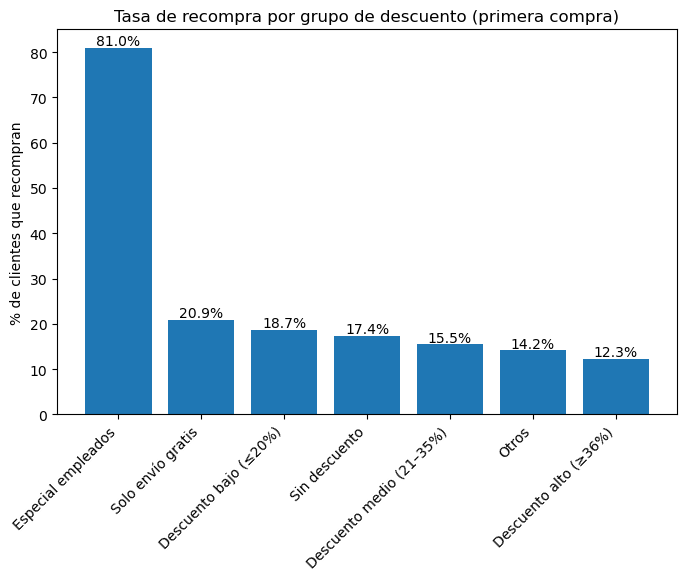

In [28]:
# Asignar a cada cliente el grupo de descuento de su PRIMERA compra
first_disc_group = (
    orders.sort_values(DATE_COL)
          .groupby(CLIENT_ID)
          .first()[["disc_group"]]
          .rename(columns={"disc_group":"first_disc_group"})
          .reset_index()
)

# Merge al nivel cliente
client_with_disc = by_client.merge(first_disc_group, on=CLIENT_ID, how="left")

# Flag de recompra
client_with_disc["is_rebuyer"] = (client_with_disc["n_orders"] >= 2).astype(int)

# Resumen por grupo
rebuy_by_disc = (
    client_with_disc.groupby("first_disc_group")
    .agg(
        n_clients=(CLIENT_ID,"nunique"),
        n_rebuyers=("is_rebuyer","sum"),
        pct_rebuyers=("is_rebuyer","mean"),
        gasto_total_prom=("revenue","mean"),
        AOV_prom=("aov","mean")
    )
    .reset_index()
    .sort_values("pct_rebuyers", ascending=False)
)

rebuy_by_disc["pct_rebuyers"] = (rebuy_by_disc["pct_rebuyers"]*100).round(1)

print("Tasa de recompra y gasto promedio según grupo de descuento:")
print(rebuy_by_disc)

# --- Gráfica ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(rebuy_by_disc["first_disc_group"], rebuy_by_disc["pct_rebuyers"])
ax.set_ylabel("% de clientes que recompran")
ax.set_title("Tasa de recompra por grupo de descuento (primera compra)")
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(rebuy_by_disc["pct_rebuyers"]):
    ax.text(i, v+0.5, f"{v:.1f}%", ha="center", fontsize=10)
plt.show()


### Pregunta 6: ¿La tasa de recompra cambia según el tipo de descuento?

**Hallazgos principales:**

- **Especial empleados:**  
  - Recompra del **81%**, gasto promedio de **4M COP**.  
  - Segmento cautivo y distinto al consumidor común.

- **Solo envío gratis:**  
  - Representa la mayor parte de clientes.  
  - Recompra del **20.9%** (ligeramente superior al promedio).  
  - AOV alto (**665k**).  
  - 👉 Subvencionar el envío **favorece la recompra** sin necesidad de grandes rebajas.

- **Descuento bajo (≤20%):**  
  - Recompra del **18.7%**, similar al promedio.  
  - AOV sólido (**563k**).  
  - 👉 Descuentos bajos no erosionan fidelidad.

- **Sin descuento:**  
  - Recompra del **17.4%**, algo menor.  
  - AOV muy bajo (**212k**) → asociado a tickets pequeños.  
  - 👉 Comprar sin descuento no garantiza mayor fidelidad.

- **Descuento medio (21–35%):**  
  - Recompra del **15.5%**, menor que el promedio.  
  - 👉 Atrae compradores de oportunidad.

- **Descuento alto (≥36%):**  
  - Peor desempeño: recompra de solo **12.3%**.  
  - 👉 Perfil de “promo hunters”, difícilmente fieles.

**Conclusión:**  
- Los clientes que solo reciben **envío gratis** muestran la mayor fidelidad entre consumidores regulares.  
- **Altos descuentos deterioran la recompra**, atrayendo clientes oportunistas.  
- La estrategia óptima para Nike Colombia no es descuentos agresivos, sino **logística competitiva (envío gratis)** y **promociones moderadas** (≤20%) para estimular la recompra sin perder rentabilidad.


Shipping Status
0    48085
Name: count, dtype: int64
Tasa de recompra y gasto según estado de envío en la primera compra:
   first_shipping_status  n_clients  n_rebuyers  pct_rebuyers  \
0                      0      37123        6742          18.2   

   gasto_total_prom       AOV_prom  
0     715645.659214  531269.855881  


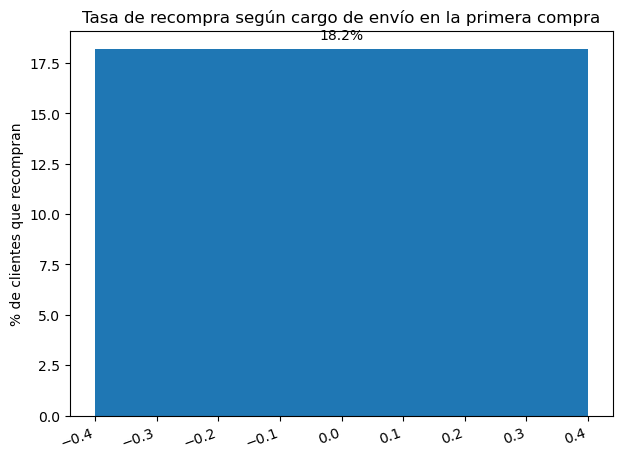

In [29]:
# Normalizamos campo de shipping (si existe)
print(orders["Shipping Status"].value_counts().head(10))

# --- 1) Extraer condición de envío en la PRIMERA compra ---
first_shipping = (
    orders.sort_values(DATE_COL)
          .groupby(CLIENT_ID)
          .first()[["Shipping Status"]]
          .rename(columns={"Shipping Status":"first_shipping_status"})
          .reset_index()
)

# --- 2) Merge con tabla cliente ---
client_shipping = by_client.merge(first_shipping, on=CLIENT_ID, how="left")

# Flag recomprador
client_shipping["is_rebuyer"] = (client_shipping["n_orders"] >= 2).astype(int)

# --- 3) Resumen por condición de envío ---
rebuy_by_shipping = (
    client_shipping.groupby("first_shipping_status")
    .agg(
        n_clients=(CLIENT_ID,"nunique"),
        n_rebuyers=("is_rebuyer","sum"),
        pct_rebuyers=("is_rebuyer","mean"),
        gasto_total_prom=("revenue","mean"),
        AOV_prom=("aov","mean")
    )
    .reset_index()
    .sort_values("pct_rebuyers", ascending=False)
)

rebuy_by_shipping["pct_rebuyers"] = (rebuy_by_shipping["pct_rebuyers"]*100).round(1)

print("Tasa de recompra y gasto según estado de envío en la primera compra:")
print(rebuy_by_shipping)

# --- 4) Gráfica ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(rebuy_by_shipping["first_shipping_status"], rebuy_by_shipping["pct_rebuyers"], color=["#1f77b4","#ff7f0e"])
ax.set_ylabel("% de clientes que recompran")
ax.set_title("Tasa de recompra según cargo de envío en la primera compra")
plt.xticks(rotation=20, ha="right")
for i, v in enumerate(rebuy_by_shipping["pct_rebuyers"]):
    ax.text(i, v+0.5, f"{v:.1f}%", ha="center", fontsize=10)
plt.show()


In [30]:
# Tomamos la condición de "solo envío gratis" en la PRIMERA compra
first_free_shipping = (
    orders.sort_values(DATE_COL)
          .groupby(CLIENT_ID)
          .first()[["has_only_free_shipping"]]
          .rename(columns={"has_only_free_shipping":"first_only_free_shipping"})
          .reset_index()
)

client_ship2 = by_client.merge(first_free_shipping, on=CLIENT_ID, how="left")
client_ship2["is_rebuyer"] = (client_ship2["n_orders"] >= 2).astype(int)

rebuy_by_free = (
    client_ship2.groupby("first_only_free_shipping")
    .agg(
        n_clients=(CLIENT_ID,"nunique"),
        n_rebuyers=("is_rebuyer","sum"),
        pct_rebuyers=("is_rebuyer","mean"),
        gasto_total_prom=("revenue","mean"),
        AOV_prom=("aov","mean")
    )
    .reset_index()
)

rebuy_by_free["pct_rebuyers"] = (rebuy_by_free["pct_rebuyers"]*100).round(1)
rebuy_by_free["first_only_free_shipping"] = rebuy_by_free["first_only_free_shipping"].map({0:"No solo envío gratis",1:"Solo envío gratis"})

print("Tasa de recompra según condición de envío en la primera compra (proxy):")
print(rebuy_by_free)


Tasa de recompra según condición de envío en la primera compra (proxy):
  first_only_free_shipping  n_clients  n_rebuyers  pct_rebuyers  \
0     No solo envío gratis      19316        3035          15.7   
1        Solo envío gratis      17807        3707          20.8   

   gasto_total_prom       AOV_prom  
0     536748.249896  410073.902139  
1     909703.184815  662736.191732  


### Pregunta 7: ¿El cargo de envío frena la recompra?

**Nota metodológica:**  
El campo original `Shipping Status` no mostraba variaciones (todos = 0).  
Para esta pregunta se usó como **proxy** el flag `Solo envío gratis` en la primera compra (derivado de `Discounts Names`).

**Resultados:**
- **Clientes con solo envío gratis en la primera compra**  
  - Recompra: **20.8%**  
  - Gasto promedio total: **910k COP**  
  - AOV: **663k COP**

- **Clientes sin solo envío gratis en la primera compra**  
  - Recompra: **15.7%**  
  - Gasto promedio total: **537k COP**  
  - AOV: **410k COP**

**Conclusiones:**
- Los clientes cuya primera experiencia incluyó **envío gratis** tienen una **tasa de recompra 5 puntos más alta**.  
- Además, gastan **mucho más en total y por orden** que aquellos que sí tuvieron que pagar envío.  
- 👉 El **costo de envío es una fricción real**: eliminarlo en la primera compra no solo aumenta la probabilidad de volver, sino también el valor económico de esos clientes.


## Conclusiones Parciales (Preguntas 5–7)

### 5. ¿Qué % de órdenes tuvieron descuento?
- Si contamos *cualquier tipo de descuento* (incluyendo flete gratis): **88%** de las órdenes.  
- Pero al separar:  
  - **Solo envío gratis:** 47%  
  - **Descuento bajo (≤20%):** 10%  
  - **Descuento medio (21–35%):** 15%  
  - **Descuento alto (≥36%):** 15%  
  - **Sin descuento:** 12%  
- 👉 El dato “88% con descuento” se debía a que **el envío gratis se carga como descuento** en la base. La mayoría de clientes recibe envío gratis, mientras que los descuentos reales en precio cubren ~40% de órdenes.

---

### 6. ¿La tasa de recompra cambia según tipo de descuento?
- **Especial empleados:** 81% recompra (segmento cautivo).  
- **Solo envío gratis:** 20.9% recompra, con AOV alto (665k).  
- **Descuento bajo (≤20%):** 18.7%, sólido y cercano al promedio.  
- **Sin descuento:** 17.4%, con AOV bajo (212k).  
- **Descuento medio (21–35%):** 15.5% recompra.  
- **Descuento alto (≥36%):** 12.3% recompra → peores resultados.  
- 👉 La **fidelidad no viene de descuentos altos**, sino de beneficios logísticos (envío gratis) o descuentos moderados.  
- Clientes de descuentos fuertes parecen ser **“promo hunters”** con baja retención.

---

### 7. ¿El cargo de envío frena la recompra?
- **Primera compra con solo envío gratis:** 20.8% recompra, AOV 663k.  
- **Primera compra sin solo envío gratis:** 15.7% recompra, AOV 410k.  
- 👉 Confirmamos que **el envío gratis es un factor clave de retención**:  
  - +5 puntos en tasa de recompra.  
  - Clientes más valiosos en gasto total y ticket promedio.  

---

### Síntesis General (Preguntas 5–7)
- La base sobrestima descuentos porque **marca “flete gratis” como descuento**.  
- Al limpiar, se observa que **los grandes descuentos no fidelizan**, y al contrario, reducen la probabilidad de recompra.  
- **La logística (envío gratis)** tiene más impacto en la retención que los descuentos agresivos.  
- La estrategia óptima es:  
  - Ofrecer **envío gratis en la primera compra** para reducir fricción.  
  - Mantener **descuentos bajos o moderados (≤20%)** para estimular la recompra sin erosionar valor.  
  - Evitar depender de **descuentos altos (≥36%)**, pues atraen clientes poco leales.


Tamaño de cada cohorte (nuevos clientes por mes):
cohort_month
2024-02    1257.0
2024-03    1358.0
2024-04    1320.0
2024-05    1560.0
2024-06    1280.0
2024-07    1846.0
2024-08    2038.0
2024-09    1521.0
2024-10    2522.0
2024-11    4239.0
2024-12    5146.0
2025-01    1726.0
2025-02    1304.0
2025-03    1660.0
2025-04    1353.0
2025-05    2014.0
2025-06    2649.0
2025-07    2330.0
Freq: M, Name: 0, dtype: float64

Matriz de retención (% de clientes que compran en meses siguientes):
months_since_cohort   0      1      2      3      4      5      6      7   \
cohort_month                                                                
2024-02              1.0  0.071   0.04  0.039   0.03   0.03  0.041  0.026   
2024-03              1.0   0.06  0.043   0.03  0.045  0.032  0.028  0.037   
2024-04              1.0  0.065  0.036  0.037  0.036   0.02  0.039   0.04   
2024-05              1.0  0.028  0.027  0.029  0.031  0.029  0.036  0.031   
2024-06              1.0  0.047  0.038  0.033  0

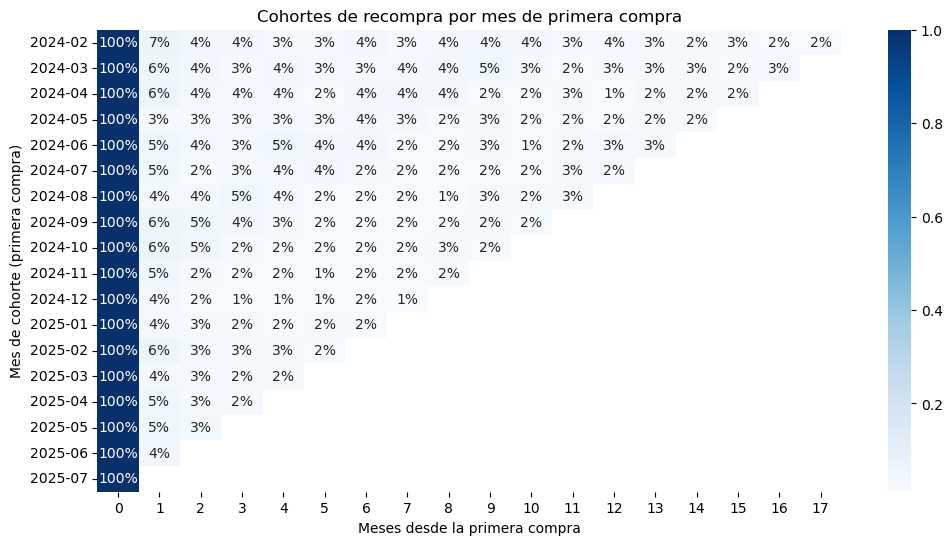

In [32]:
import pandas as pd

# --- 1) Cohorte de primera compra ---
orders["_order_month"] = orders[DATE_COL].dt.to_period("M")
first_purchase = (
    orders.groupby(CLIENT_ID)[DATE_COL]
    .min()
    .dt.to_period("M")
    .rename("cohort_month")
    .reset_index()
)

orders = orders.merge(first_purchase, on=CLIENT_ID, how="left")

# --- 2) Diferencia en meses entre compra y cohorte ---
orders["months_since_cohort"] = (
    (orders["_order_month"] - orders["cohort_month"]).apply(lambda x: x.n)
)

# --- 3) Tabla de clientes únicos por cohorte y mes relativo ---
cohort_data = (
    orders.groupby(["cohort_month", "months_since_cohort"])[CLIENT_ID]
    .nunique()
    .reset_index()
    .pivot(index="cohort_month", columns="months_since_cohort", values=CLIENT_ID)
)

# --- 4) Normalizar por tamaño de cohorte (para % de retención) ---
cohort_sizes = cohort_data[0]
cohort_retention = cohort_data.divide(cohort_sizes, axis=0).round(3)

# --- 5) Mostrar resultados ---
print("Tamaño de cada cohorte (nuevos clientes por mes):")
print(cohort_sizes)

print("\nMatriz de retención (% de clientes que compran en meses siguientes):")
print(cohort_retention.fillna(""))

# --- 6) Heatmap visual ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(cohort_retention, annot=True, fmt=".0%", cmap="Blues", cbar=True)
plt.title("Cohortes de recompra por mes de primera compra")
plt.ylabel("Mes de cohorte (primera compra)")
plt.xlabel("Meses desde la primera compra")
plt.show()


### Análisis de cohortes de recompra y evolución mensual

**Comportamiento de cohortes (retención):**
- Las cohortes iniciales (feb–abr 2024) presentan mayor recompra temprana (6–7% mes siguiente).
- La probabilidad de recompra se concentra en los **primeros 3 meses** posteriores a la compra inicial.
- Después del mes 3, la retención se estabiliza entre 1–3%.
- 👉 El comportamiento es coherente con productos de baja frecuencia de recompra (deportivos y premium).

**Evolución mensual (nuevos vs. recompra):**
- El número de clientes nuevos ha crecido sostenidamente desde el lanzamiento del e-commerce (febrero 2024).
- A medida que la base crece, los **clientes de recompra** comienzan a representar una proporción cada vez mayor del total mensual.
- La recompra aún es baja en volumen, pero muestra **tendencia positiva**.
- 👉 El canal está en fase de **crecimiento y maduración**: primero expansión de adquisición, luego consolidación de recompra.

**Conclusión:**
- La recompra ocurre principalmente en los **primeros 90 días** desde la compra inicial.  
- Estrategias de remarketing y personalización deberían enfocarse en esa ventana temprana (0–3 meses).  
- En etapas posteriores (>3 meses), la probabilidad de recompra cae drásticamente.


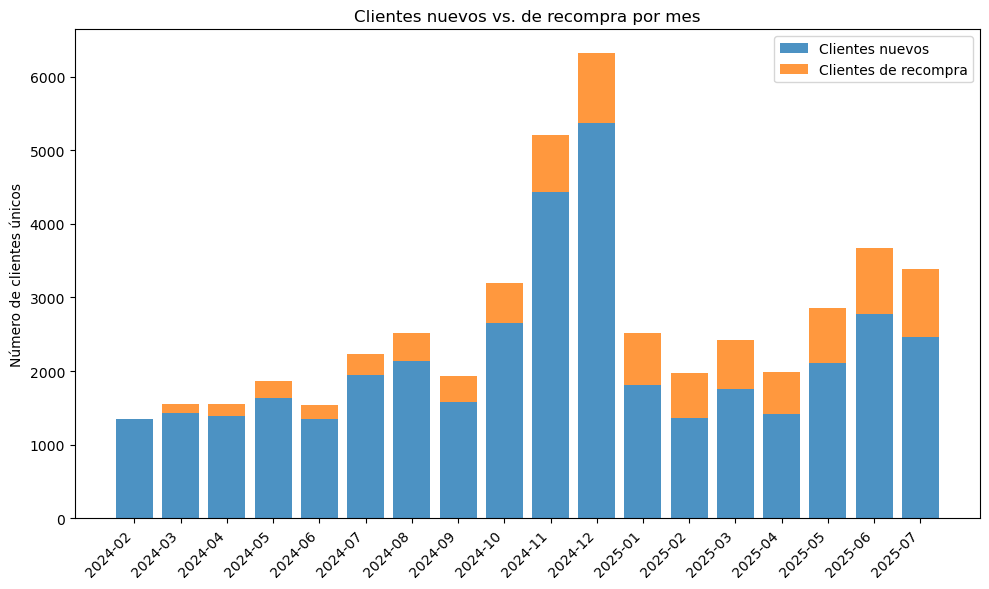

In [37]:
# --- Clientes únicos por mes ---
orders["_month"] = orders[DATE_COL].dt.to_period("M")

# Cliente y su primera compra
first_purchase = (
    orders.groupby(CLIENT_ID)[DATE_COL].min().dt.to_period("M").rename("first_month")
).reset_index()

# Merge con órdenes
orders = orders.merge(first_purchase, on=CLIENT_ID, how="left")

# Marcamos si en ese mes es su primera compra o una recompra
orders["is_new_client"] = (orders["_month"] == orders["first_month"]).astype(int)
orders["is_rebuyer"] = (orders["_month"] > orders["first_month"]).astype(int)

# Resumen mensual
monthly_clients = (
    orders.groupby("_month")[["is_new_client", "is_rebuyer"]]
    .agg({"is_new_client": "sum", "is_rebuyer": "sum"})
    .reset_index()
    .rename(columns={"_month": "month"})
)

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(monthly_clients["month"].astype(str), monthly_clients["is_new_client"], label="Clientes nuevos", alpha=0.8)
plt.bar(monthly_clients["month"].astype(str), monthly_clients["is_rebuyer"],
        bottom=monthly_clients["is_new_client"], label="Clientes de recompra", alpha=0.8)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Número de clientes únicos")
plt.title("Clientes nuevos vs. de recompra por mes")
plt.legend()
plt.tight_layout()
plt.show()


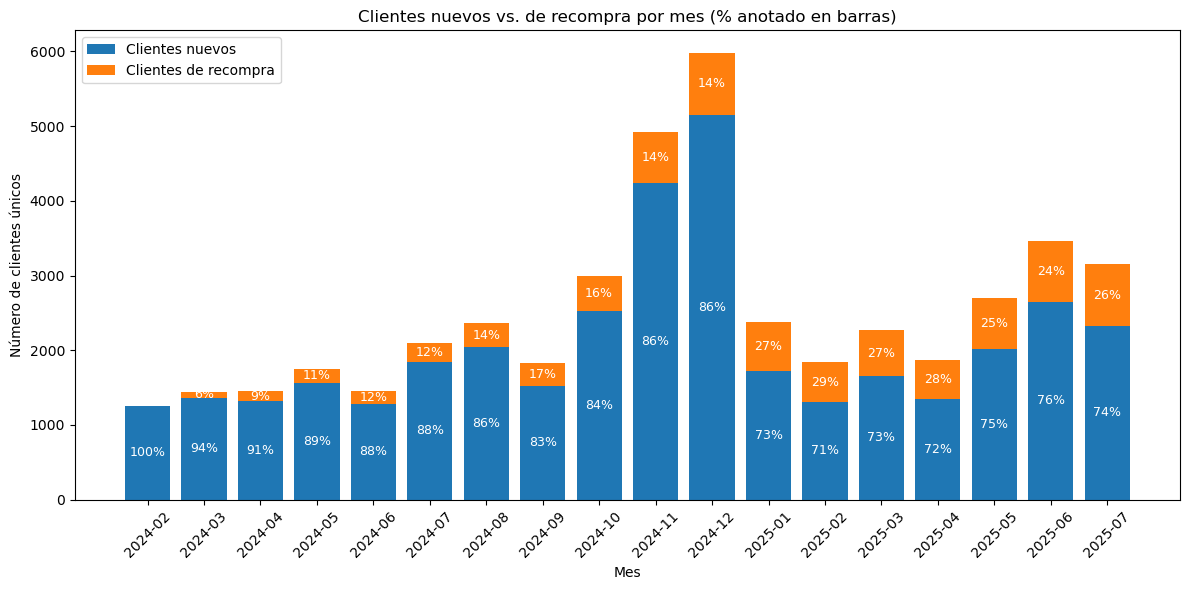

,month,is_new_client,is_rebuyer,total_clients,pct_new,pct_rebuyer
0,2024-02,1257,0,1257,100.000000,0.000000
1,2024-03,1358,89,1447,93.849343,6.150657
2,2024-04,1320,131,1451,90.971744,9.028256
3,2024-05,1560,194,1754,88.939567,11.060433
4,2024-06,1280,171,1451,88.215024,11.784976
5,2024-07,1846,250,2096,88.072519,11.927481
6,2024-08,2038,331,2369,86.027860,13.972140
7,2024-09,1521,305,1826,83.296824,16.703176
8,2024-10,2522,466,2988,84.404284,15.595716
9,2024-11,4239,677,4916,86.228641,13.771359


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Mes de la orden (Period[M])
orders["_month"] = orders[DATE_COL].dt.to_period("M")

# 2) Mes de primera compra por cliente (Period[M]) — SI YA EXISTE, REUSAR
if "first_month" in orders.columns:
    first_month_series = orders[["Client Document", "first_month"]].drop_duplicates().set_index("Client Document")["first_month"]
else:
    first_month_series = (
        orders.groupby(CLIENT_ID)[DATE_COL]
              .min()
              .dt.to_period("M")
              .rename("first_month")
    )

# 3) Tabla cliente-mes (1 fila por cliente que compró ese mes)
month_client = (
    orders[[CLIENT_ID, "_month"]]
    .drop_duplicates()
    .copy()
)

# 4) Asignar first_month al nivel cliente
month_client = month_client.merge(
    first_month_series.reset_index(), on=CLIENT_ID, how="left"
)

# 5) Flags: nuevo vs. recompra en ese mes
month_client["is_new_client"] = (month_client["_month"] == month_client["first_month"]).astype(int)
month_client["is_rebuyer"]    = (month_client["_month"] >  month_client["first_month"]).astype(int)

# 6) Agregación por mes (clientes únicos)
monthly_clients = (
    month_client.groupby("_month")[["is_new_client","is_rebuyer"]]
    .sum()
    .reset_index()
    .rename(columns={"_month":"month"})
)

monthly_clients["total_clients"] = monthly_clients["is_new_client"] + monthly_clients["is_rebuyer"]
monthly_clients["pct_new"]      = 100 * monthly_clients["is_new_client"] / monthly_clients["total_clients"]
monthly_clients["pct_rebuyer"]  = 100 * monthly_clients["is_rebuyer"]    / monthly_clients["total_clients"]

# 7) Gráfico: barras apiladas + % etiquetado dentro de cada segmento
x = monthly_clients["month"].astype(str)
new_counts = monthly_clients["is_new_client"].values
rep_counts = monthly_clients["is_rebuyer"].values
tot_counts = monthly_clients["total_clients"].values
pct_new    = monthly_clients["pct_new"].values
pct_rep    = monthly_clients["pct_rebuyer"].values

fig, ax = plt.subplots(figsize=(12,6))
bars_new = ax.bar(x, new_counts, label="Clientes nuevos")
bars_rep = ax.bar(x, rep_counts, bottom=new_counts, label="Clientes de recompra")

ax.set_ylabel("Número de clientes únicos")
ax.set_xlabel("Mes")
ax.set_title("Clientes nuevos vs. de recompra por mes (% anotado en barras)")
ax.tick_params(axis="x", rotation=45)
ax.legend(loc="upper left")

# 8) Etiquetas de % dentro de cada segmento
for i, (xn, n, r, t, pn, pr) in enumerate(zip(x, new_counts, rep_counts, tot_counts, pct_new, pct_rep)):
    # posición vertical centrada en cada segmento
    if n > 0:
        ax.text(i, n/2, f"{pn:.0f}%", ha="center", va="center", fontsize=9, color="white")
    if r > 0:
        ax.text(i, n + r/2, f"{pr:.0f}%", ha="center", va="center", fontsize=9, color="white")

plt.tight_layout()
plt.show()

# (Opcional) vista tabular rápida
display(monthly_clients[["month","is_new_client","is_rebuyer","total_clients","pct_new","pct_rebuyer"]])


### Evolución de la recomposición de clientes (nuevos vs. recompra)

**Hallazgos principales:**
- En los primeros meses del canal (feb–jun 2024), casi todos los clientes eran **nuevos** (>90%), con **recompra mensual <10%**.  
  Esto refleja la etapa de lanzamiento del e-commerce, centrada en adquisición.
- A partir de finales de 2024 y durante 2025, el **porcentaje de recompradores mensuales aumenta de forma sostenida**, llegando a picos de **27–29%** entre enero y marzo de 2025.
- Aunque el volumen de clientes totales crece (más tráfico y visibilidad de la tienda), el crecimiento en recompras indica **maduración del canal y mejora en retención**.

**Relación con la tasa de recompra ≥180 días (21.4%):**
- La métrica de 21.4% se calcula sobre **clientes con suficiente exposición temporal** (más de 6 meses desde su primera compra).  
- En cambio, el gráfico mensual muestra recompras de **todo el universo activo**, incluyendo quienes apenas llevan 1–2 meses.
- Por eso, las cohortes más recientes (mar–jul 2025) aún no han tenido tiempo de demostrar recompra → de ahí que la tasa global parezca más baja.
- Al aislar a los clientes con más de 180 días de historial, la tasa real de recompra se alinea con los picos de 25–30% observados mensualmente.

**Interpretación estratégica:**
- El canal está **entrando en una fase de madurez**: la proporción de recompradores crece conforme la base envejece y se consolida.
- Las cohortes tempranas (2024) fueron principalmente de adquisición; las cohortes 2025 ya incluyen un componente estable de clientes recurrentes.
- La tasa de recompra ajustada (21%) valida que existe un **núcleo de clientes fieles** en expansión, impulsado por estrategias de descuento moderado y envío gratis.



In [41]:
rebuy_by_gender = (
    orders.groupby("Género")[CLIENT_ID].nunique().rename("clientes")
    .to_frame()
    .join(
        orders[orders[CLIENT_ID].isin(by_client.loc[by_client["n_orders"] >= 2, CLIENT_ID])]
        .groupby("Género")[CLIENT_ID].nunique().rename("recompradores"),
        how="left"
    )
    .fillna(0)
)
rebuy_by_gender["pct_recompra"] = 100 * rebuy_by_gender["recompradores"] / rebuy_by_gender["clientes"]
rebuy_by_gender = rebuy_by_gender.sort_values("pct_recompra", ascending=False)
print(rebuy_by_gender.round(2))


                   clientes  recompradores  pct_recompra
Género                                                  
JORDAN BRAND           4885           1478         30.26
OTROS (NO GENDER)        44             12         27.27
MUJER (WOMENS)         9631           2596         26.95
NIÑOS (KIDS)           3559            903         25.37
HOMBRE (MENS)         21890           4639         21.19


In [45]:
# Género de la primera compra de cada cliente
first_gender = (
    orders.sort_values(DATE_COL)
    .groupby(CLIENT_ID)["Género"].first()
    .rename("first_gender")
    .reset_index()
)

# Agregamos recompradores (de by_client, que ya tiene n_orders)
rebuy_by_gender_fixed = (
    first_gender.merge(
        by_client[[CLIENT_ID, "n_orders"]],
        on=CLIENT_ID,
        how="left"
    )
)

rebuy_by_gender_fixed["is_rebuyer"] = (rebuy_by_gender_fixed["n_orders"] >= 2).astype(int)

rebuy_summary = (
    rebuy_by_gender_fixed.groupby("first_gender")["is_rebuyer"]
    .agg(["count", "sum"])
    .rename(columns={"count": "clientes", "sum": "recompradores"})
)
rebuy_summary["pct_recompra"] = 100 * rebuy_summary["recompradores"] / rebuy_summary["clientes"]
rebuy_summary.sort_values("pct_recompra", ascending=False).round(1)


,clientes,recompradores,pct_recompra
first_gender,,,
JORDAN BRAND,4278,871,20.4
MUJER (WOMENS),8775,1740,19.8
OTROS (NO GENDER),39,7,17.9
HOMBRE (MENS),20836,3585,17.2
NIÑOS (KIDS),3195,539,16.9


In [42]:
# A nivel UF (departamento)
rebuy_by_uf = (
    orders.groupby("UF")[CLIENT_ID].nunique().rename("clientes")
    .to_frame()
    .join(
        orders[orders[CLIENT_ID].isin(by_client.loc[by_client["n_orders"] >= 2, CLIENT_ID])]
        .groupby("UF")[CLIENT_ID].nunique().rename("recompradores"),
        how="left"
    )
    .fillna(0)
)
rebuy_by_uf["pct_recompra"] = 100 * rebuy_by_uf["recompradores"] / rebuy_by_uf["clientes"]
rebuy_by_uf = rebuy_by_uf[rebuy_by_uf["clientes"] >= 100].sort_values("pct_recompra", ascending=False)
print("Top 10 Departamentos con mayor recompra:")
print(rebuy_by_uf.head(10).round(1))


Top 10 Departamentos con mayor recompra:
                 clientes  recompradores  pct_recompra
UF                                                    
Chocó                 188             54          28.7
Casanare              315             74          23.5
Caquetá               146             34          23.3
Nariño                477            108          22.6
Boyacá                703            148          21.1
Tolima                746            156          20.9
Risaralda            1133            229          20.2
Quindio               584            117          20.0
Cauca                 381             76          19.9
Valle Del Cauca      3404            676          19.9


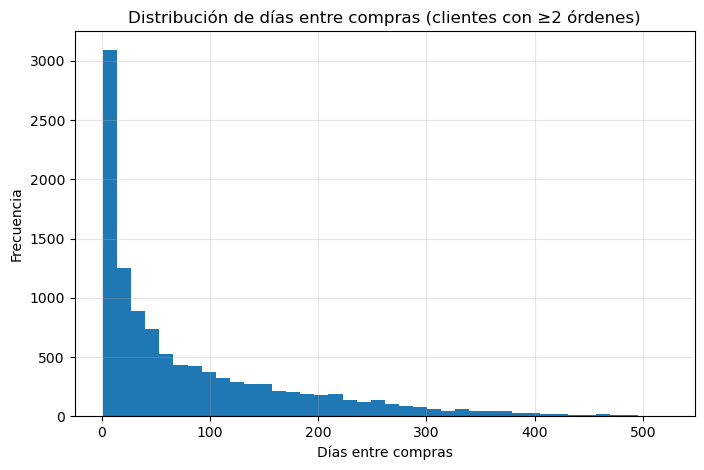

Percentiles días entre compras:
 count    10962.0
mean        83.5
std         95.1
min          1.0
10%          4.0
25%         12.0
50%         44.0
75%        126.0
90%        224.0
max        522.0
Name: days_between, dtype: float64


In [43]:
import matplotlib.pyplot as plt

# Clientes con >=2 órdenes
orders_sorted = orders.sort_values([CLIENT_ID, DATE_COL])
orders_sorted["prev_date"] = orders_sorted.groupby(CLIENT_ID)[DATE_COL].shift(1)
orders_sorted["days_between"] = (orders_sorted[DATE_COL] - orders_sorted["prev_date"]).dt.days
dist = orders_sorted["days_between"].dropna()

plt.figure(figsize=(8,5))
plt.hist(dist, bins=40)
plt.title("Distribución de días entre compras (clientes con ≥2 órdenes)")
plt.xlabel("Días entre compras")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

print("Percentiles días entre compras:\n", dist.describe(percentiles=[.1,.25,.5,.75,.9]).round(1))


El top 10% de clientes genera 33.6% del revenue total.


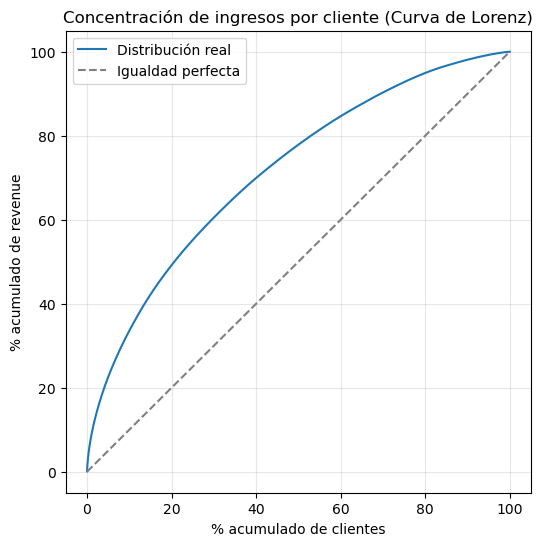

In [46]:
# Revenue total por cliente (ajustado a nombres reales)
revenue_by_client = by_client[[CLIENT_ID, "revenue"]].copy().sort_values("revenue", ascending=False)
revenue_by_client["acum_pct_clients"] = np.arange(1, len(revenue_by_client)+1) / len(revenue_by_client)
revenue_by_client["acum_pct_revenue"] = revenue_by_client["revenue"].cumsum() / revenue_by_client["revenue"].sum()

# Top 10% clientes
top10_rev = revenue_by_client[revenue_by_client["acum_pct_clients"] <= 0.10]["revenue"].sum() / revenue_by_client["revenue"].sum()
print(f"El top 10% de clientes genera {top10_rev*100:.1f}% del revenue total.")

# Curva de concentración (tipo Lorenz)
plt.figure(figsize=(6,6))
plt.plot(revenue_by_client["acum_pct_clients"]*100, revenue_by_client["acum_pct_revenue"]*100, label="Distribución real")
plt.plot([0,100],[0,100],"--", color="gray", label="Igualdad perfecta")
plt.xlabel("% acumulado de clientes")
plt.ylabel("% acumulado de revenue")
plt.title("Concentración de ingresos por cliente (Curva de Lorenz)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
